In [1]:
import pandas as pd
import numpy as np
import torch 
import tensorflow as tf
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Importing Vibration Data and converting it to proper Time-series format.

In [67]:
dataframes = []  # To store the imported data from each file

for i in range(1, 61):
    file = f"Data/{i}.xlsx"
    df = pd.read_excel(file)  # Use pd.read_excel() for Excel files
    df = df.dropna(axis='columns', how='all')  # Drop empty columns
    df = df.dropna(axis='rows', how='all')  # Drop empty rows
    df.columns = ['Time', 'X', 'Y', 'Z']  # Assign column names explicitly
    df = df.iloc[1:]  # Exclude the original header row from the data
    df['Time'] = pd.to_datetime(df['Time'], unit='s').dt.time  # Convert 'Time' column to datetime
    dataframes.append(df)
    print(i)
exp = pd.read_excel("Data/Experiment Summary.xlsx")


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


In [74]:
#view imported data.

for i in range(60):
    print(dataframes[i])

                  Time         X         Y         Z
1             00:00:00 -0.961714 -2.247089  -4.40107
2      00:00:00.000976 -0.394591 -2.298639 -1.552597
3      00:00:00.001953  -5.44346  0.849591   5.49498
4      00:00:00.002929  -1.46255   0.77963  1.958311
5      00:00:00.003906  1.148426   1.03738 -1.342826
...                ...       ...       ...       ...
98812  00:01:36.495000 -0.545578  0.021109  2.797396
98813  00:01:36.496000 -2.762514  1.902683  2.955644
98814  00:01:36.497000 -0.147856 -0.159316 -1.166176
98815  00:01:36.498000  -0.75917 -0.464933  2.385214
98816  00:01:36.499000 -2.386887  2.186207   1.56821

[98816 rows x 4 columns]
                   Time         X         Y         Z
1              00:00:00 -1.212132  1.217805  3.375187
2       00:00:00.000976 -1.370485  1.744351  2.039275
3       00:00:00.001953  3.089165  2.274579 -0.801837
4       00:00:00.002929  0.120975  1.409276  -0.48534
5       00:00:00.003906 -0.928571 -0.203501  0.887373
...           

In [60]:
frequency_dataframes = []
for df in dataframes:
    time_data = df['Time'].values  # Extract the time data from the dataframe
    accelerometer_data = df[['X', 'Y', 'Z']].values  # Extract the accelerometer data

    # Apply FFT on each accelerometer axis separately
    frequency_data = np.fft.fft(accelerometer_data, axis=0)

    # Create a new dataframe with frequency data
    frequency_df = pd.DataFrame(frequency_data, columns=['X_freq', 'Y_freq', 'Z_freq'])
    frequency_df['Time'] = time_data

    frequency_dataframes.append(frequency_df)

C:\Users\moury\AppData\Local\Temp\ipykernel_24360\4220189729.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


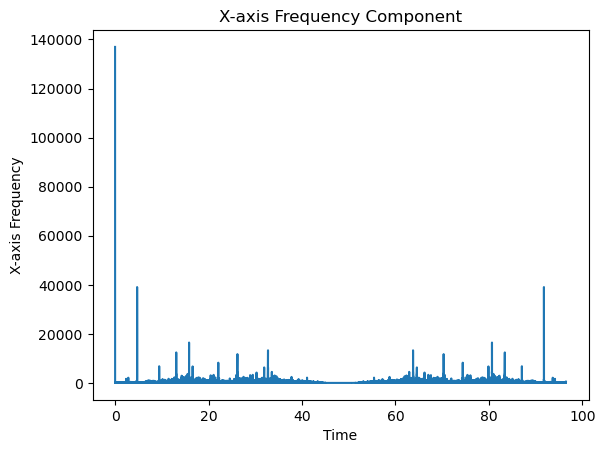

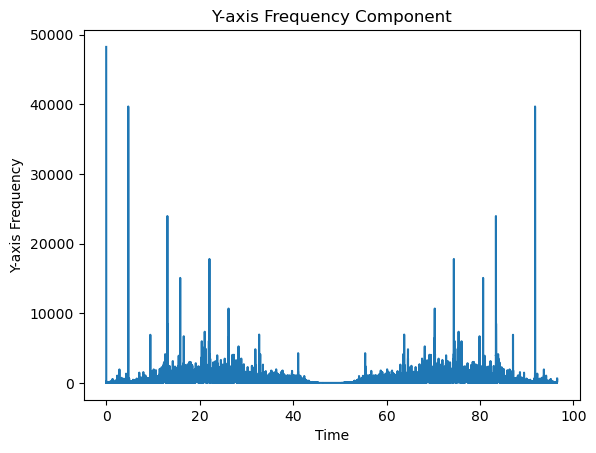

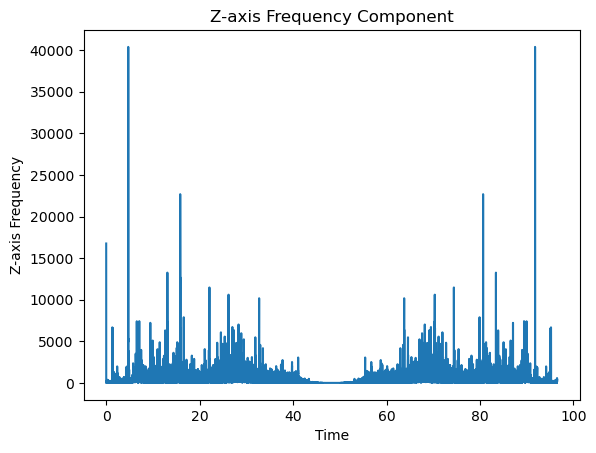

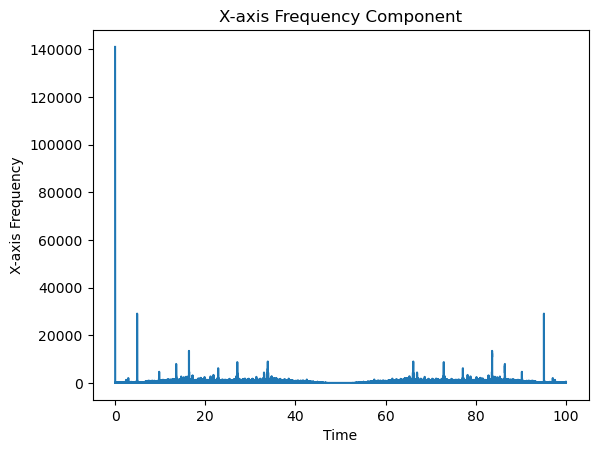

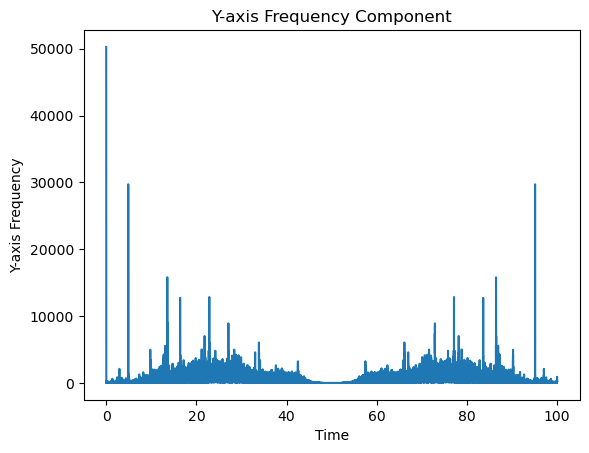

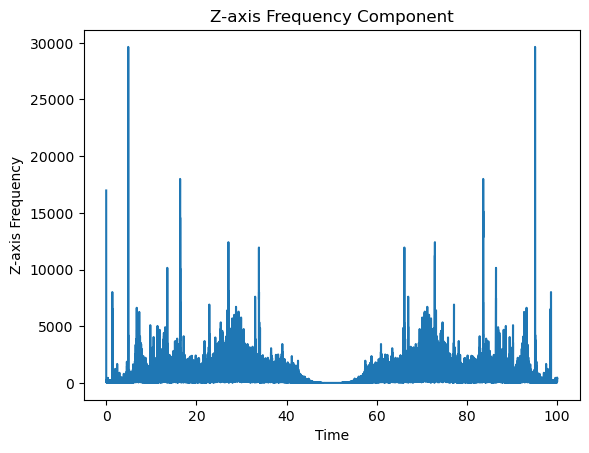

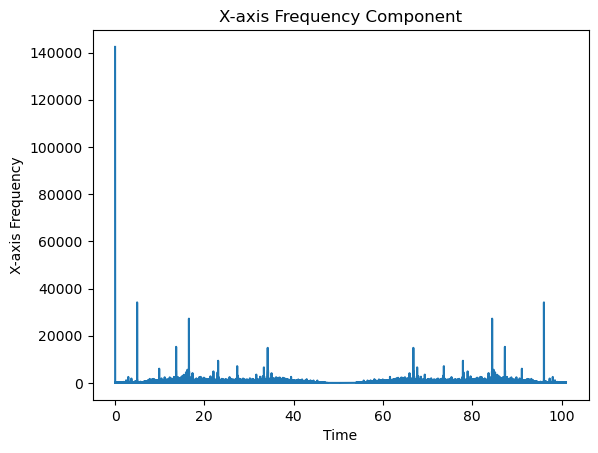

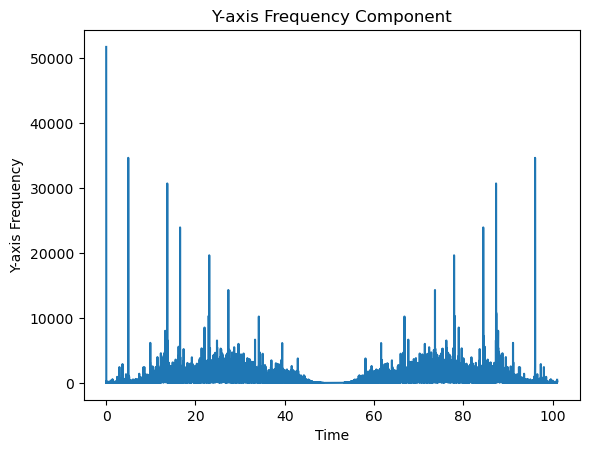

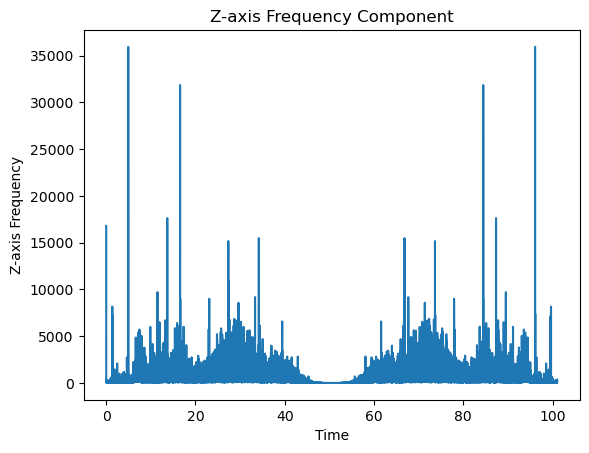

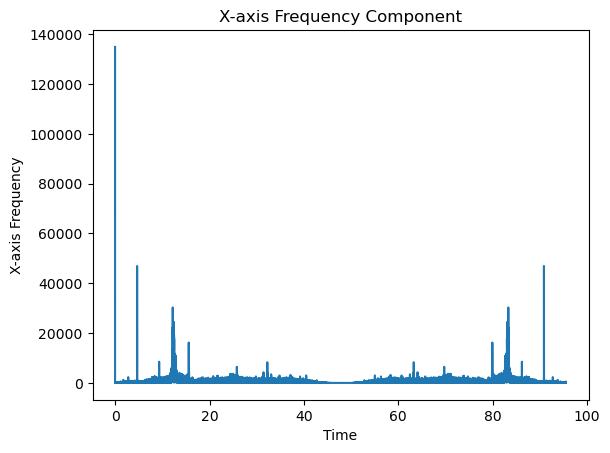

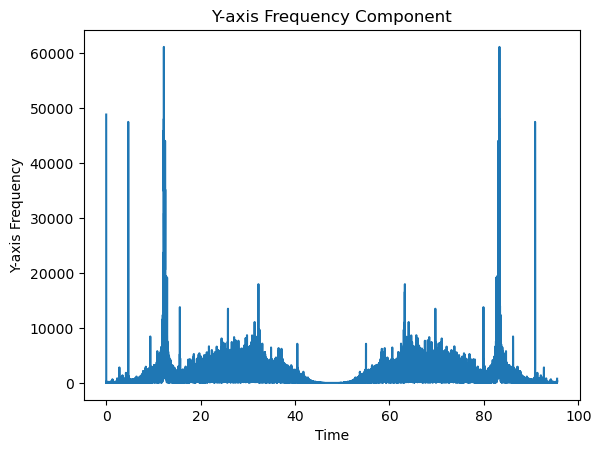

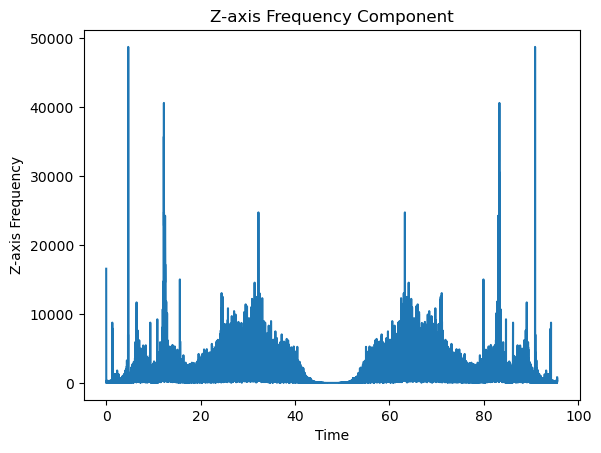

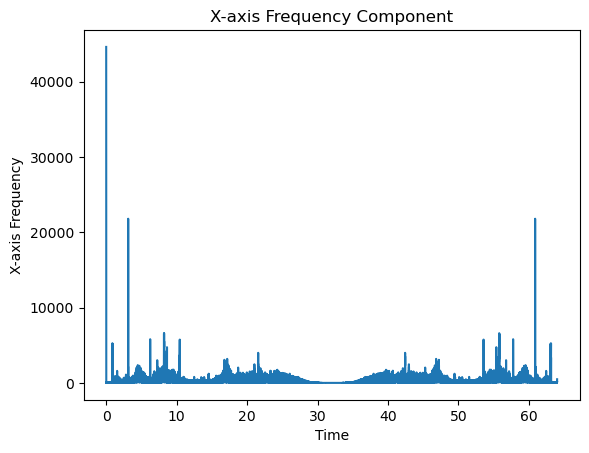

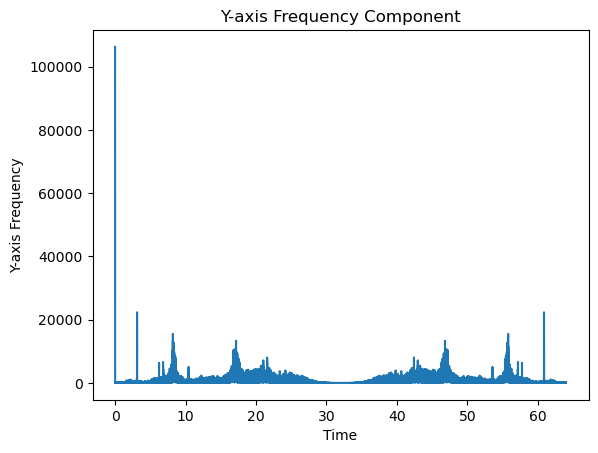

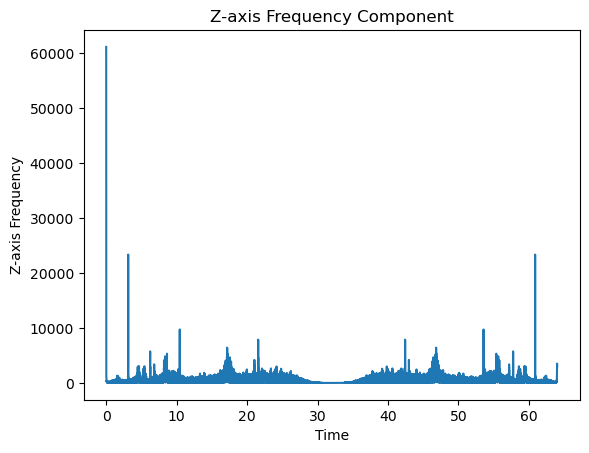

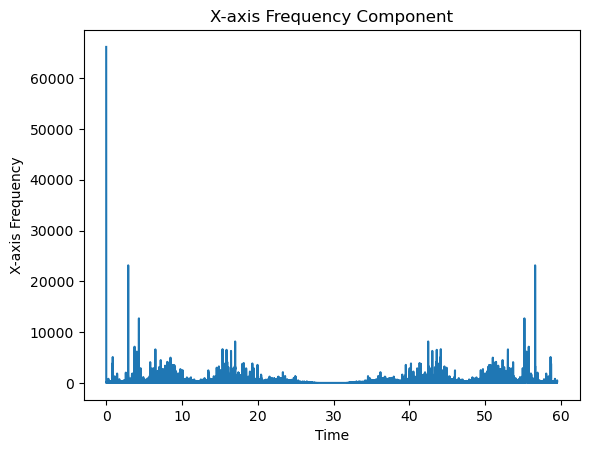

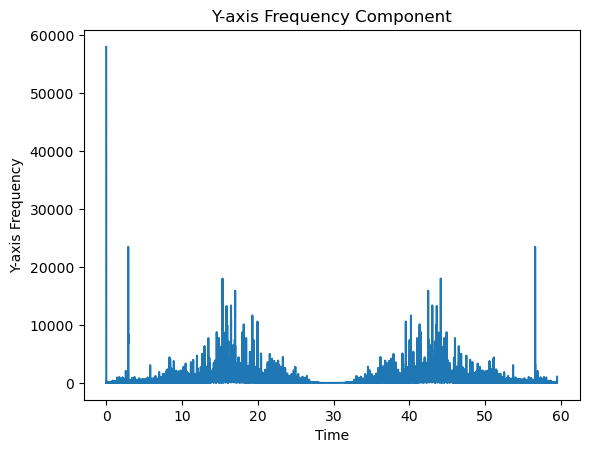

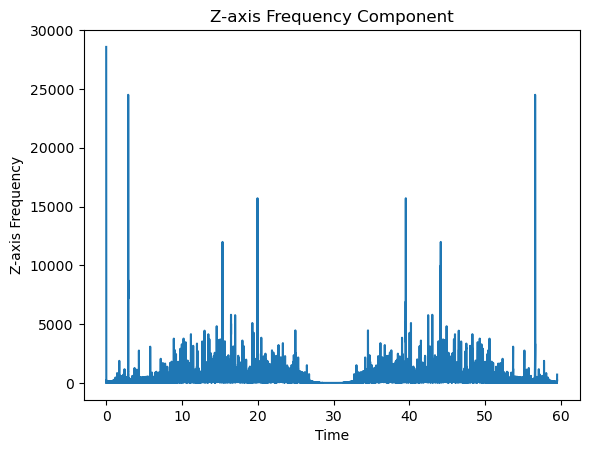

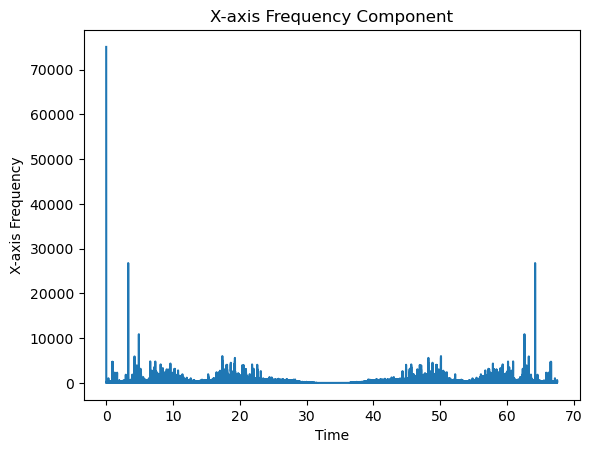

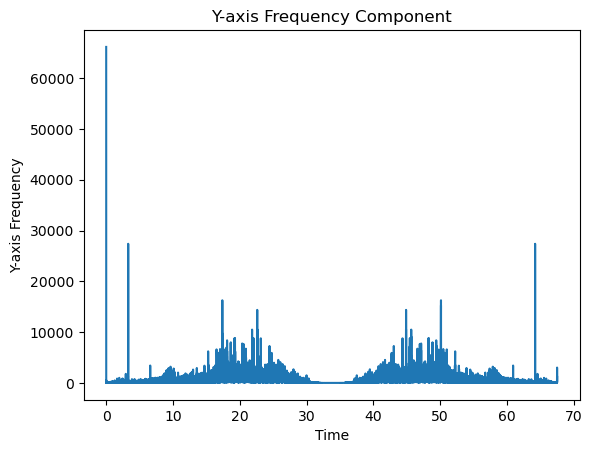

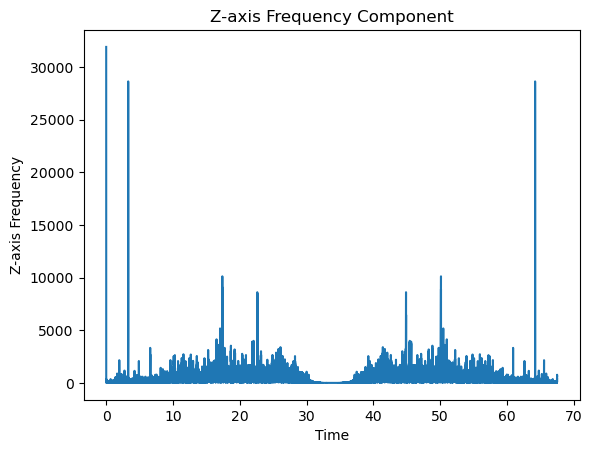

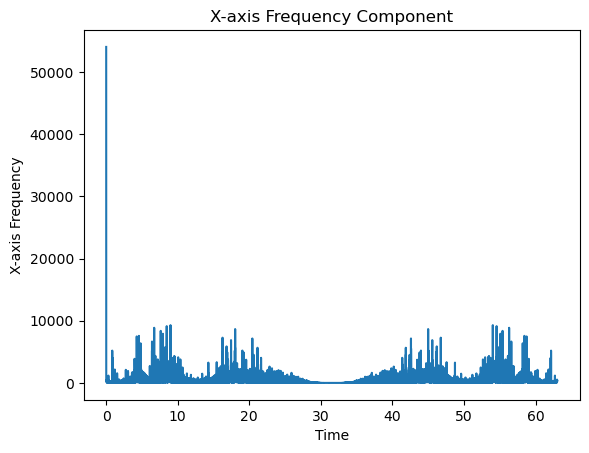

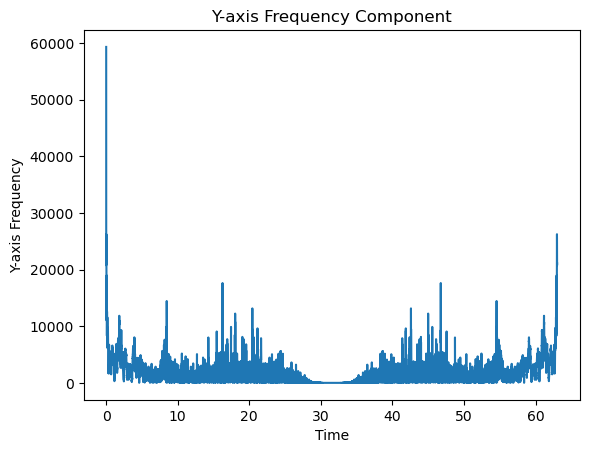

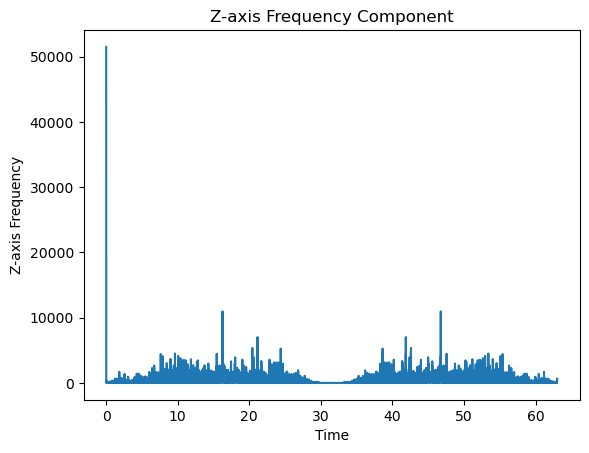

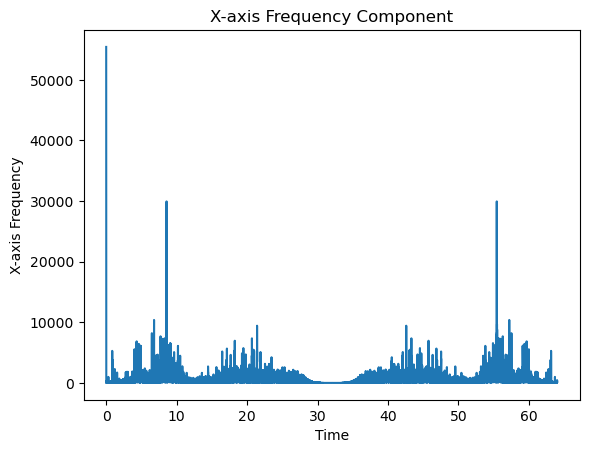

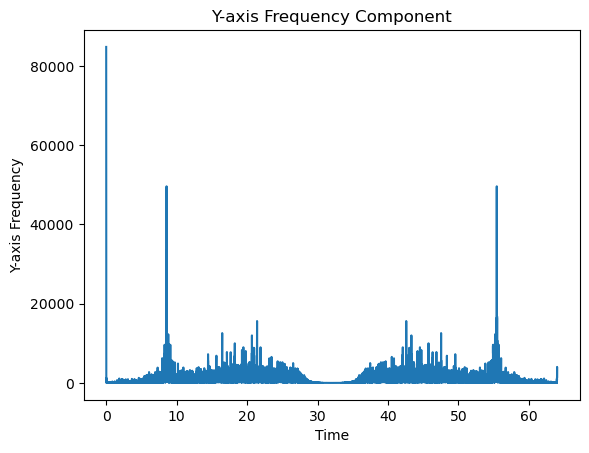

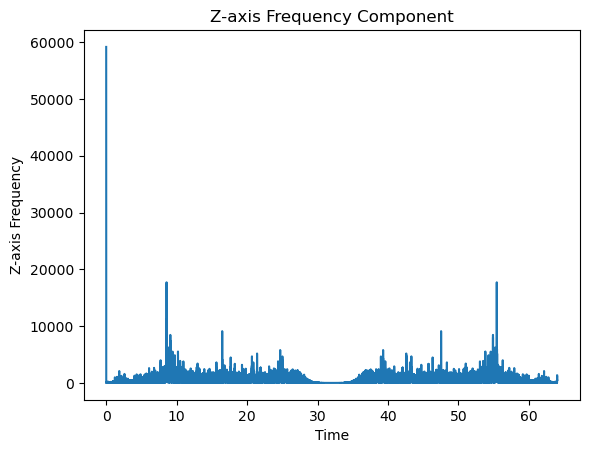

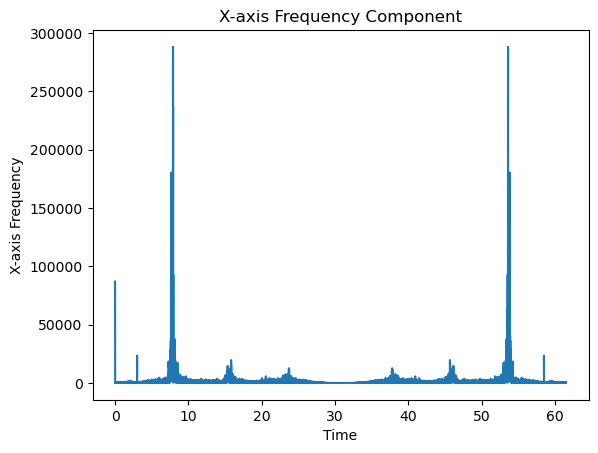

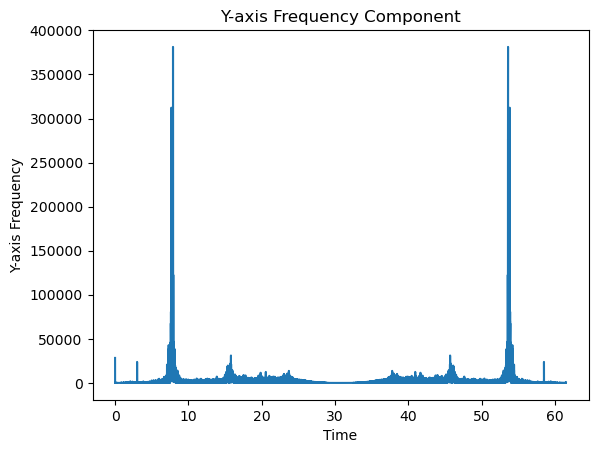

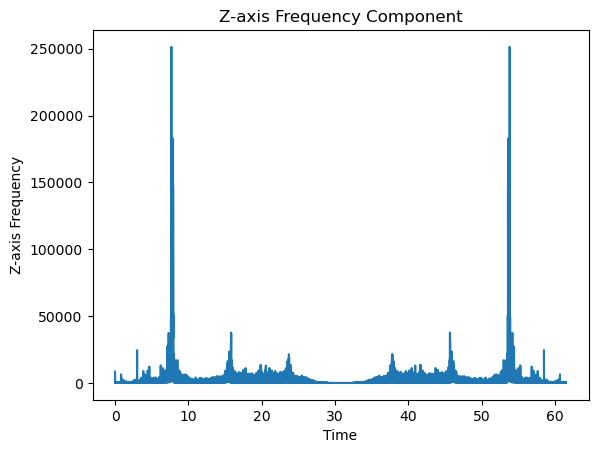

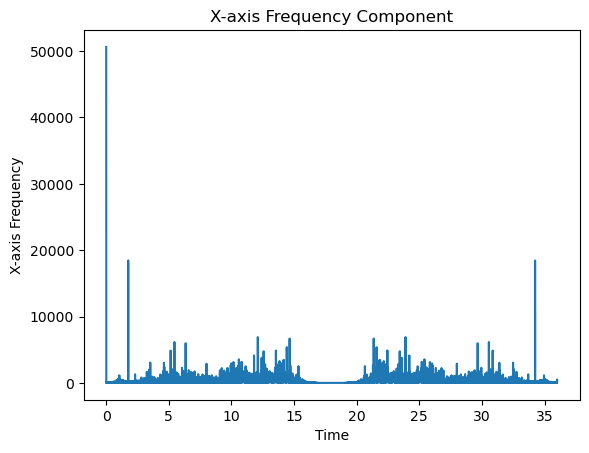

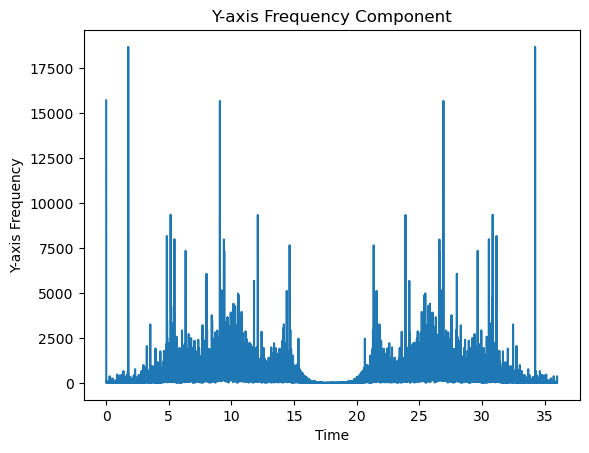

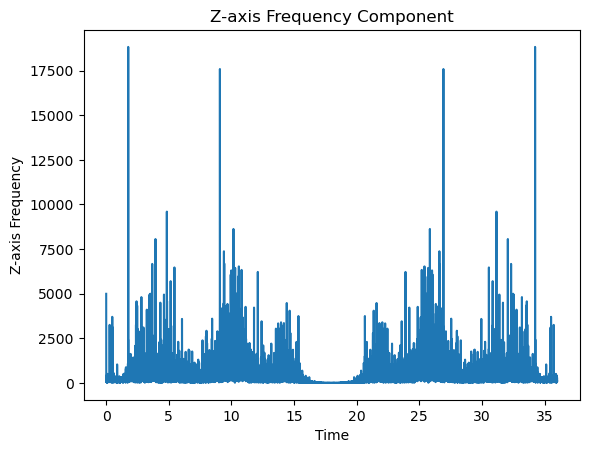

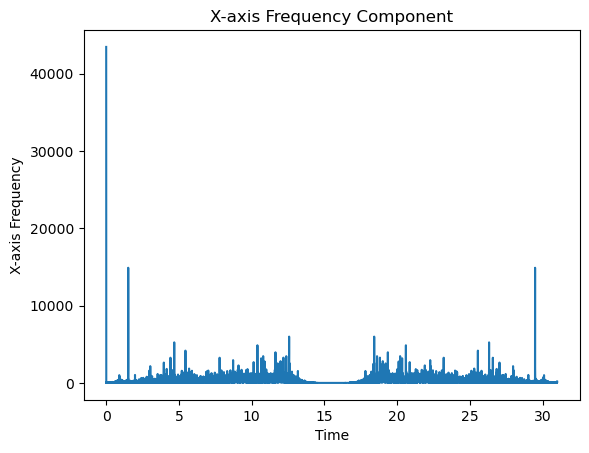

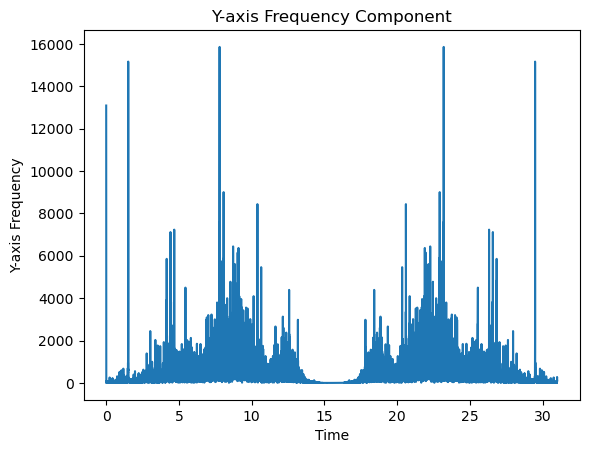

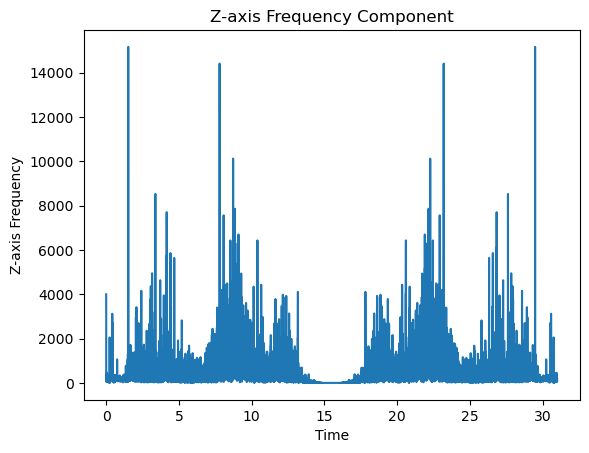

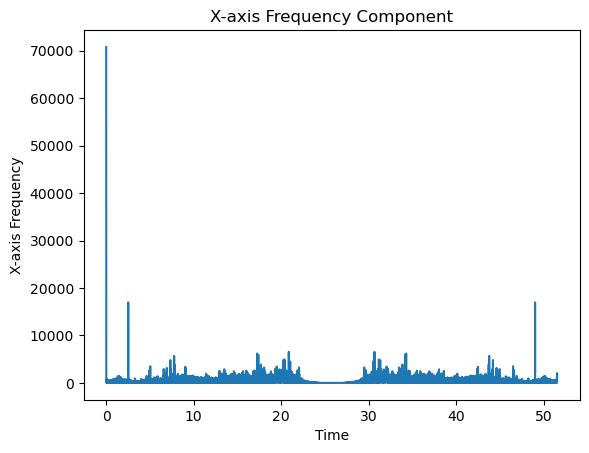

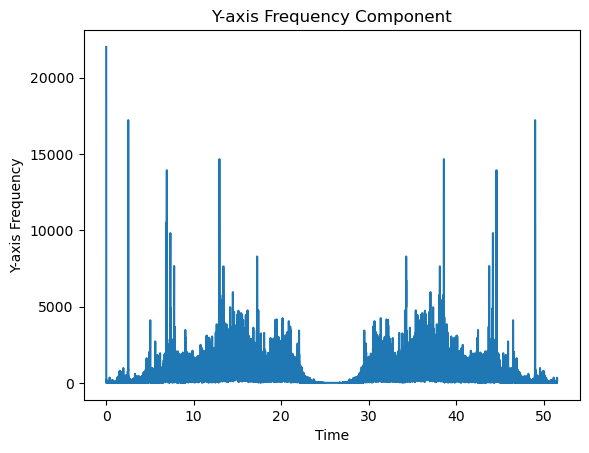

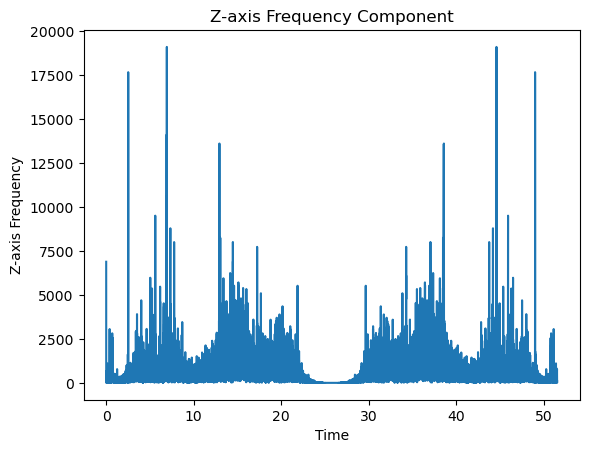

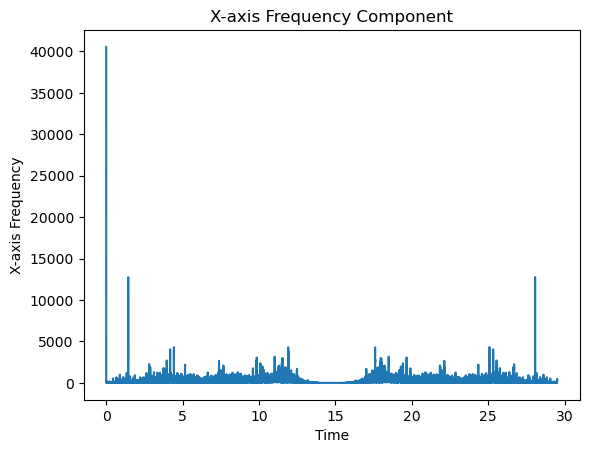

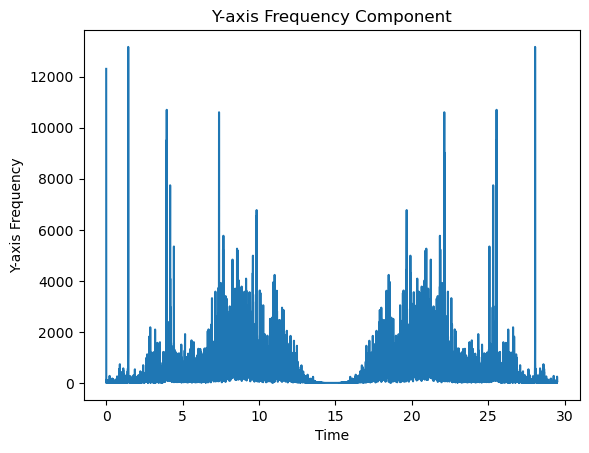

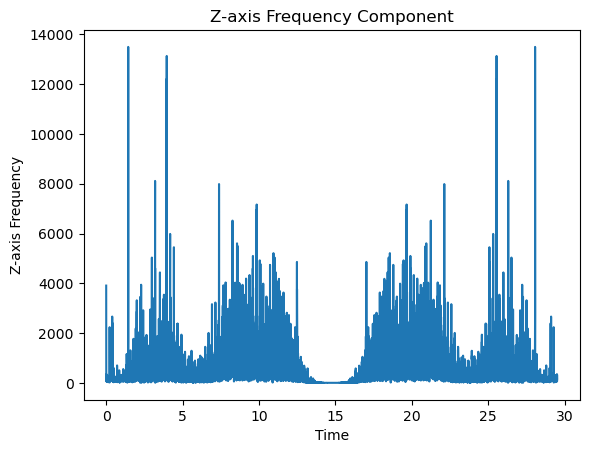

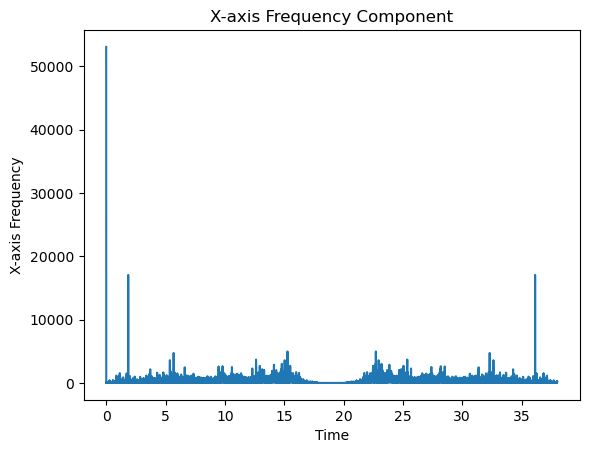

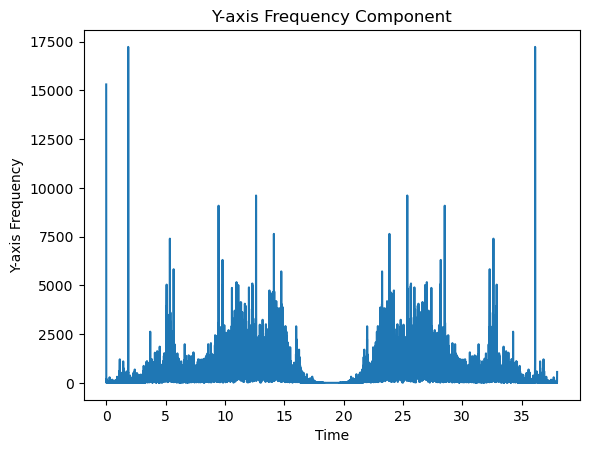

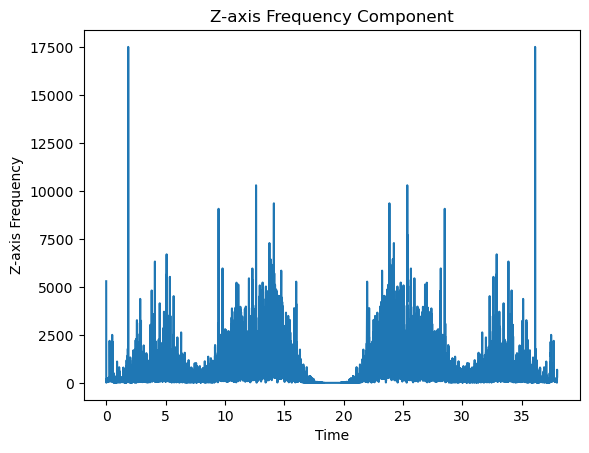

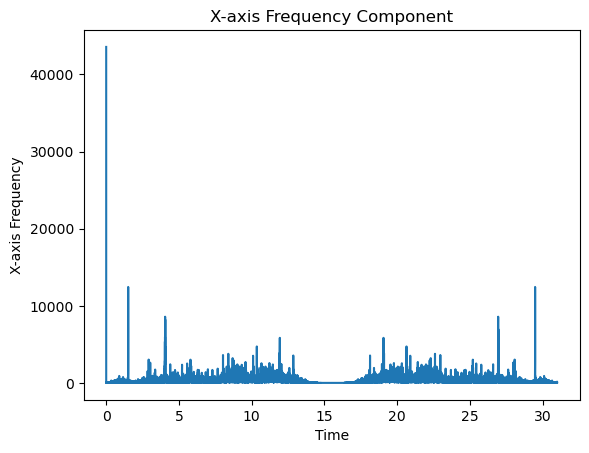

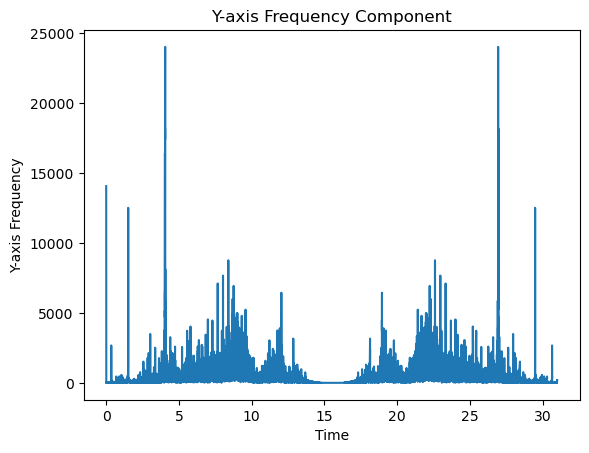

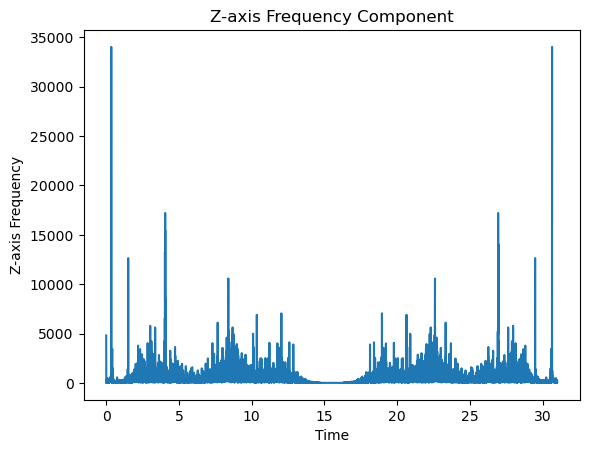

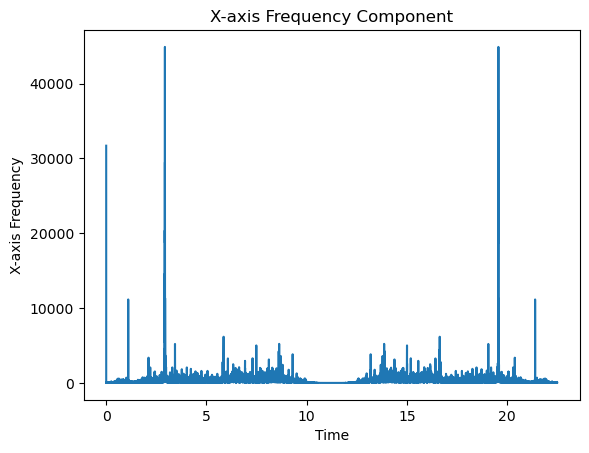

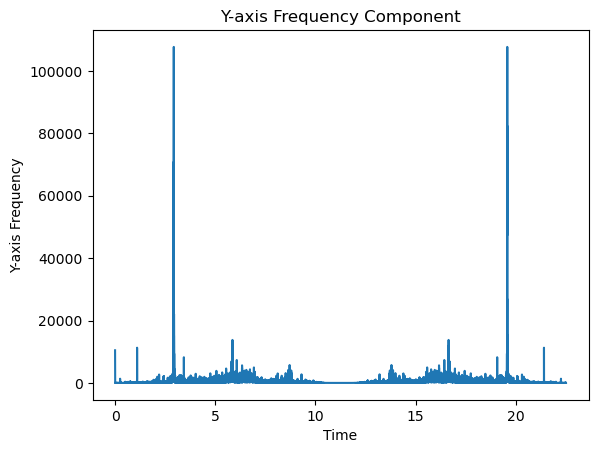

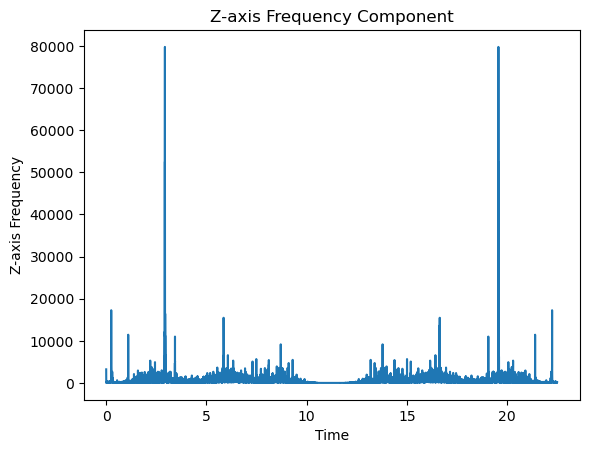

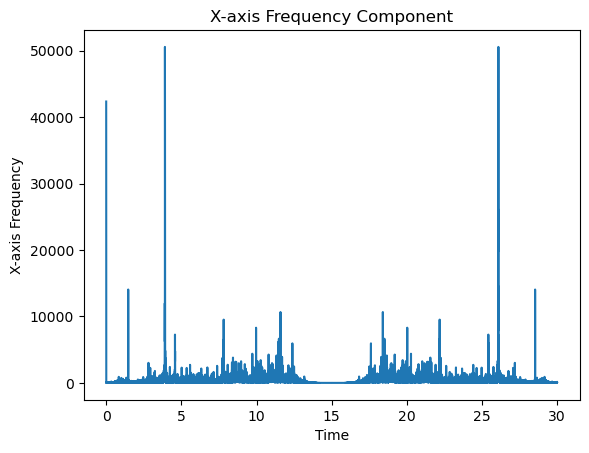

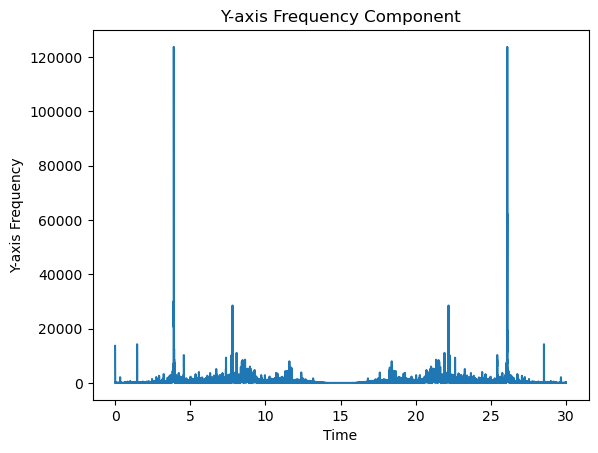

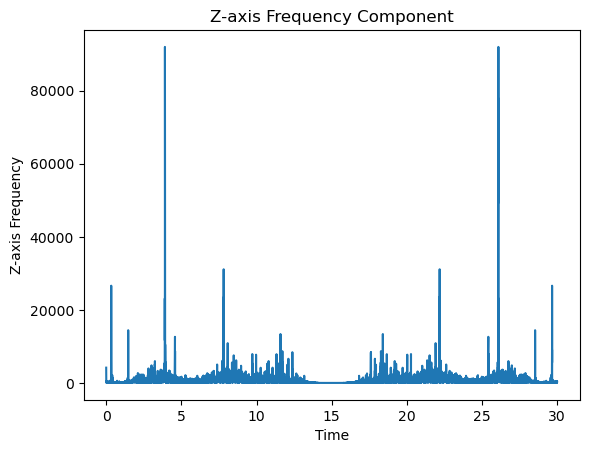

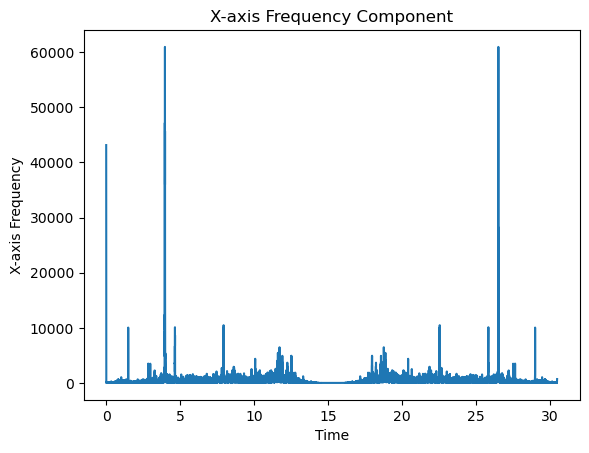

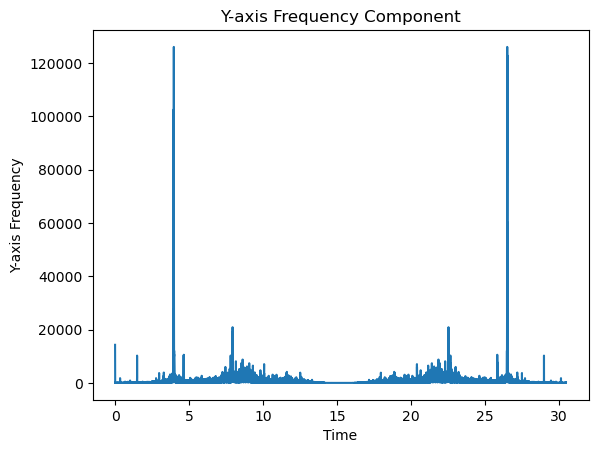

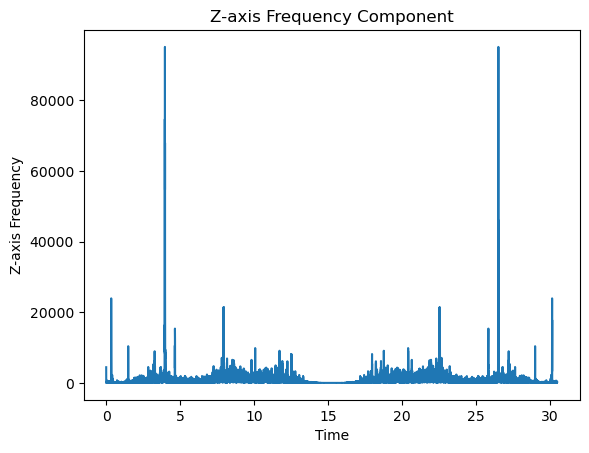

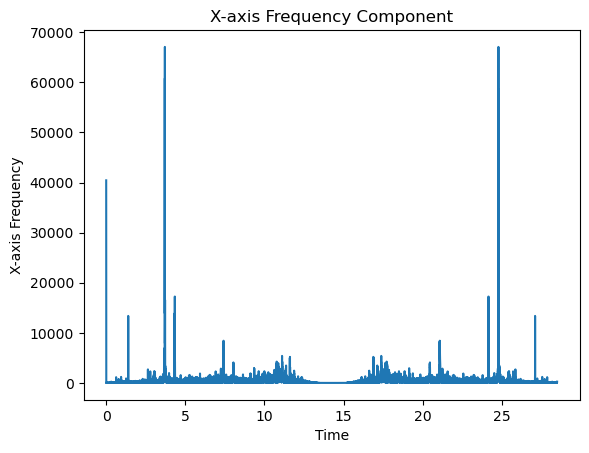

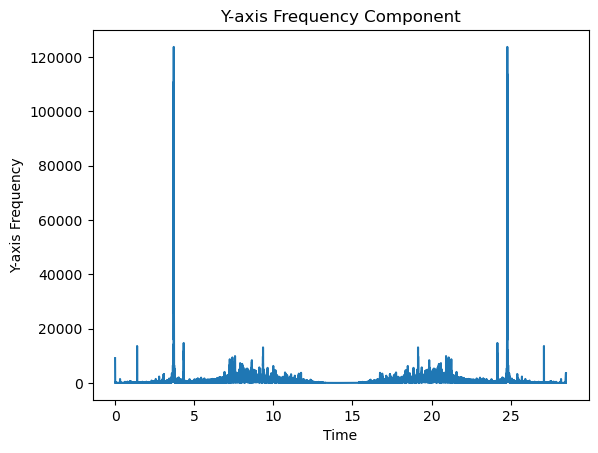

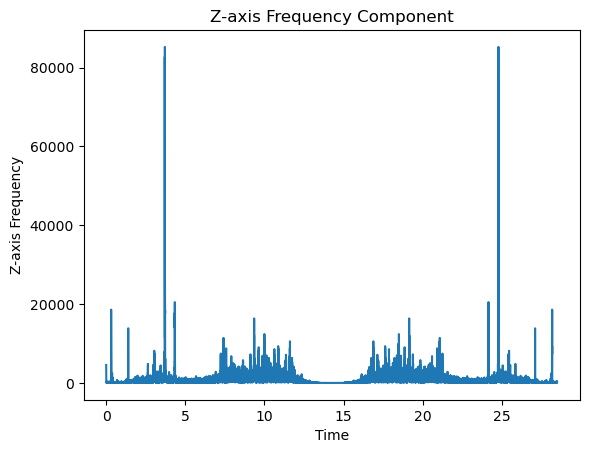

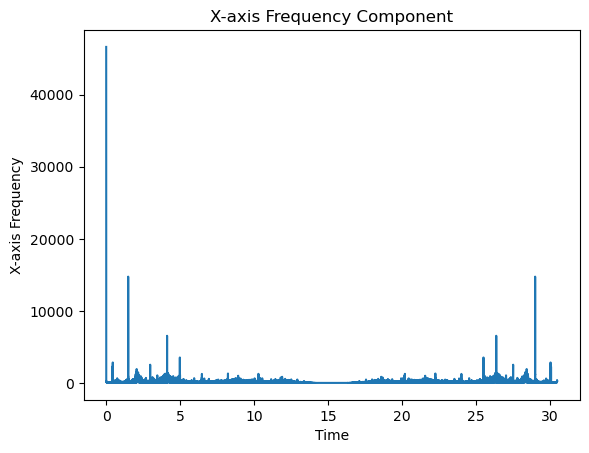

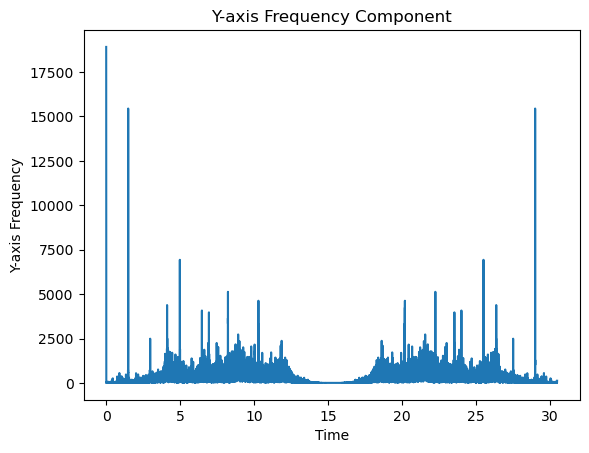

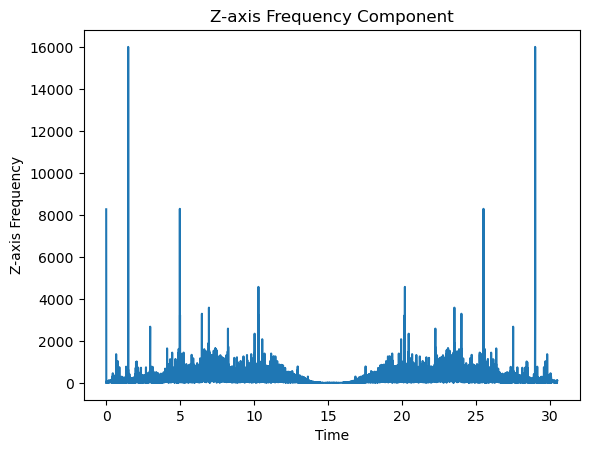

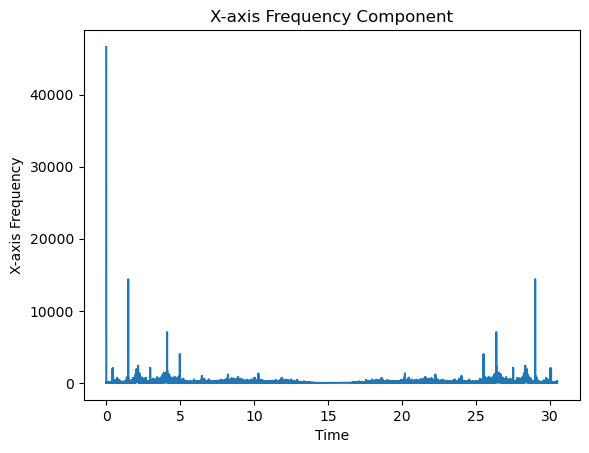

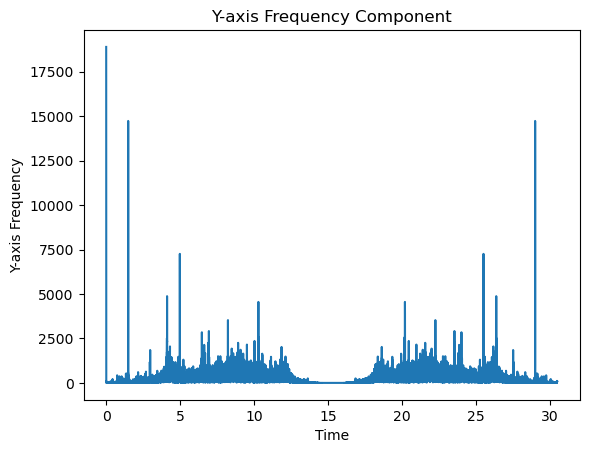

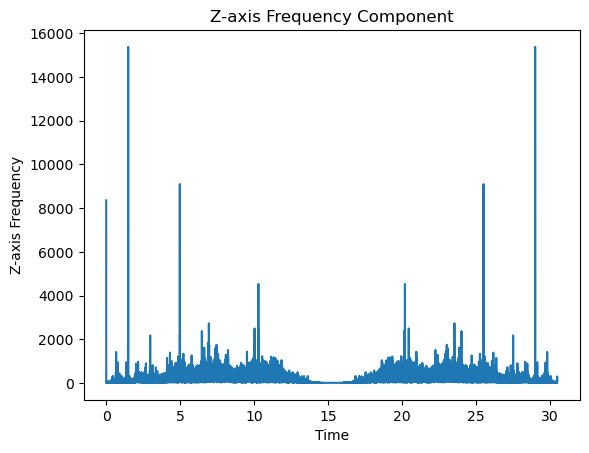

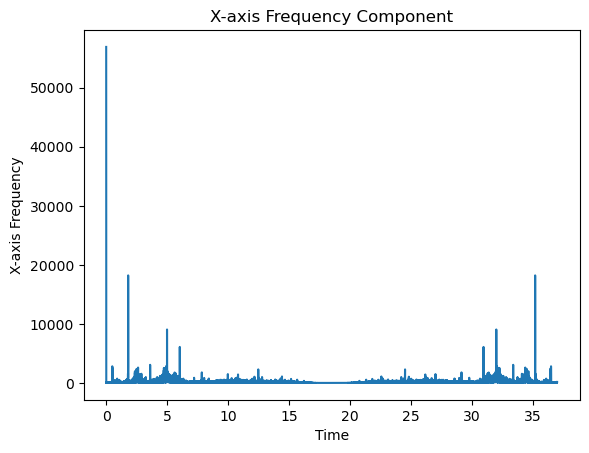

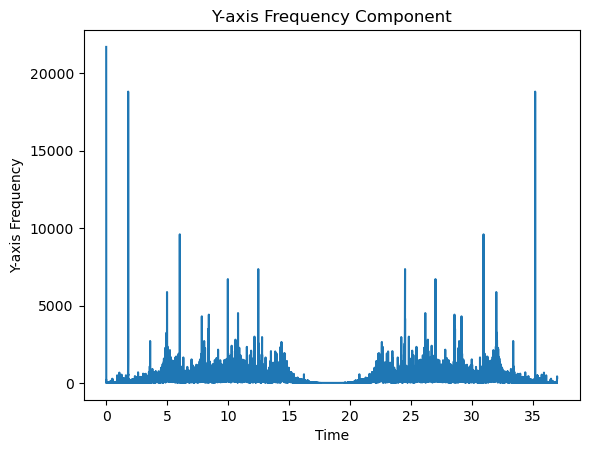

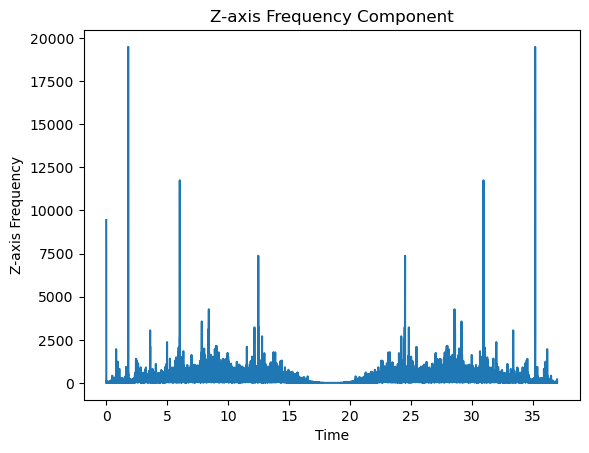

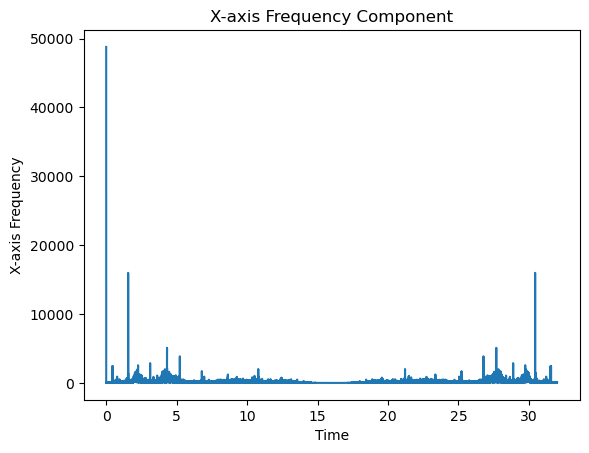

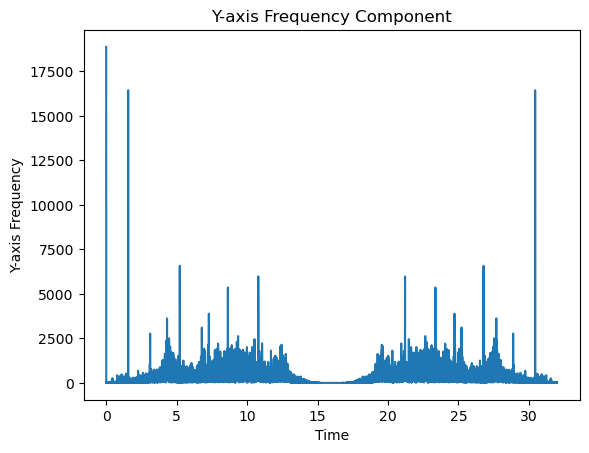

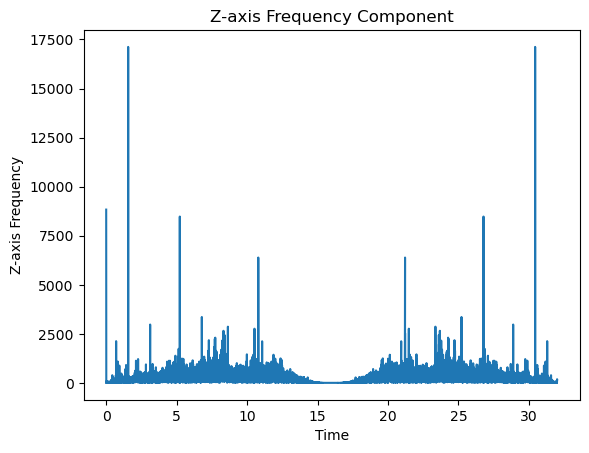

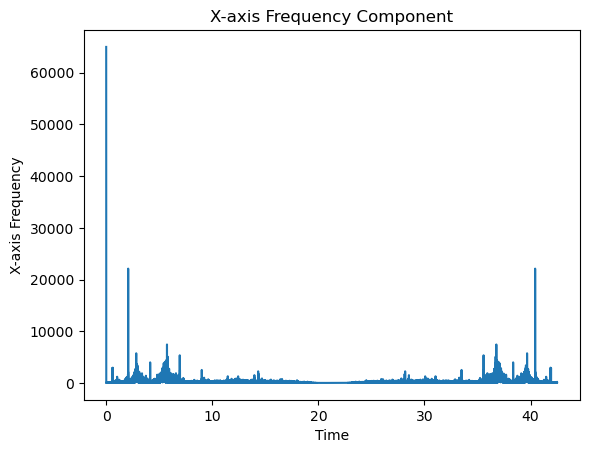

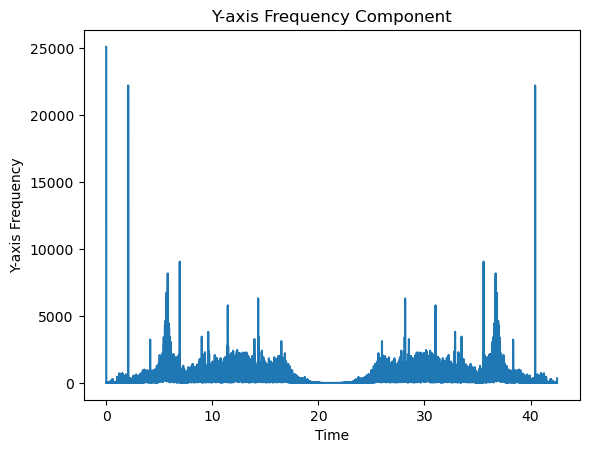

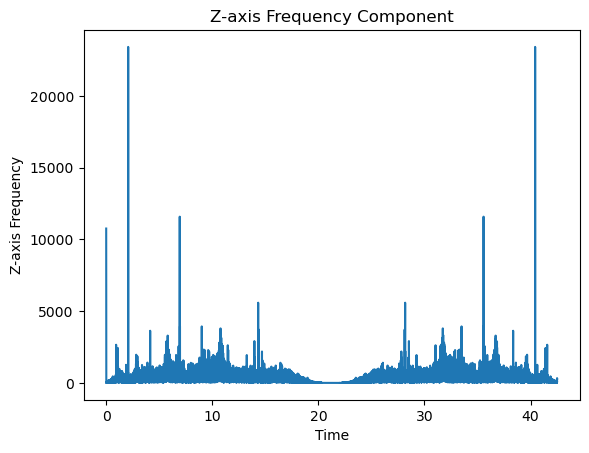

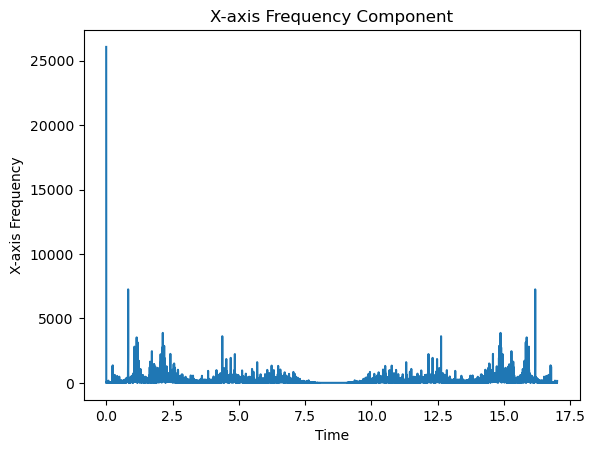

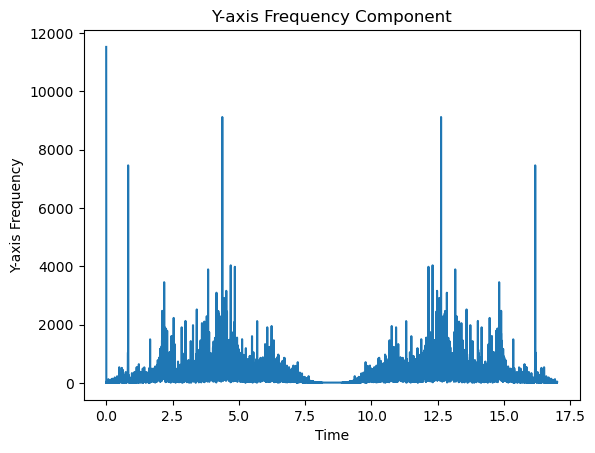

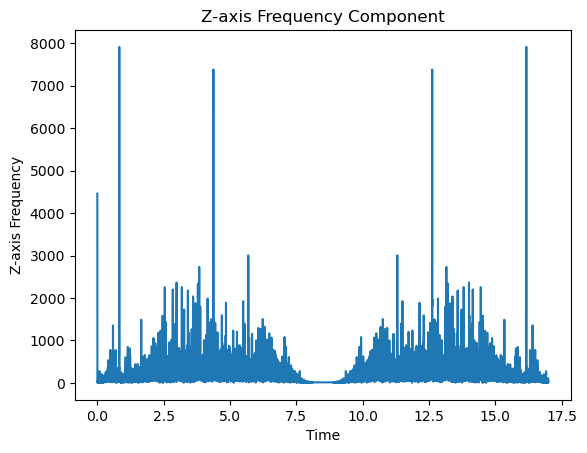

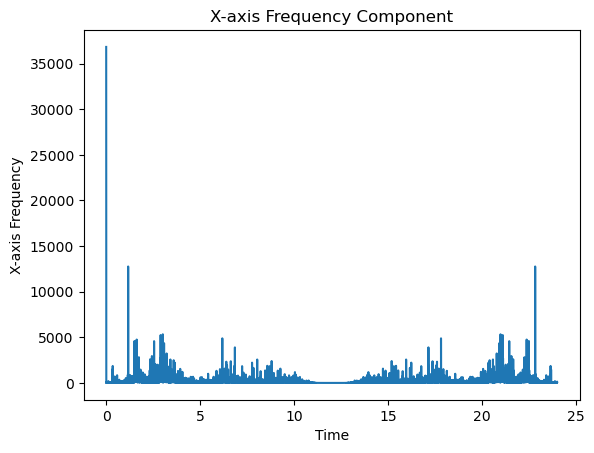

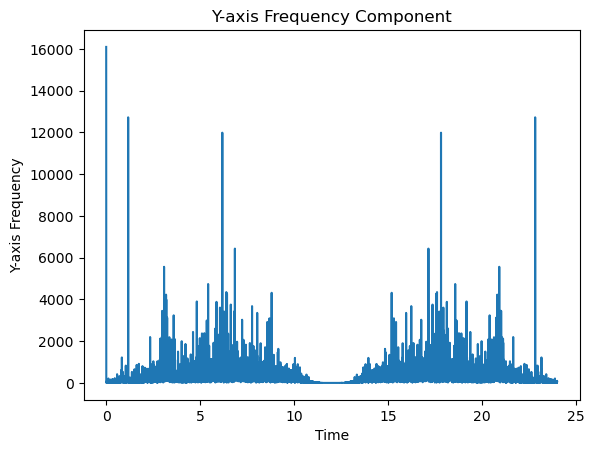

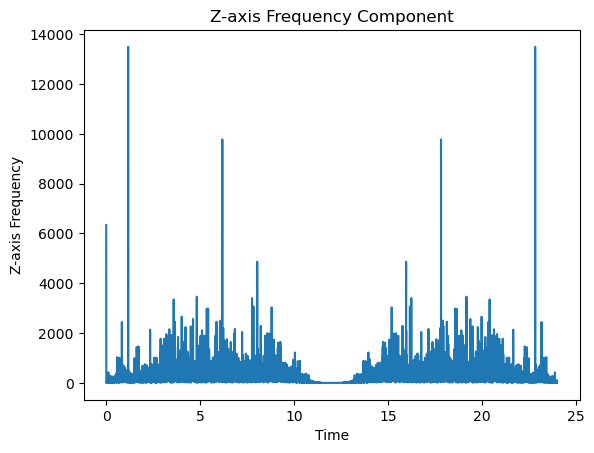

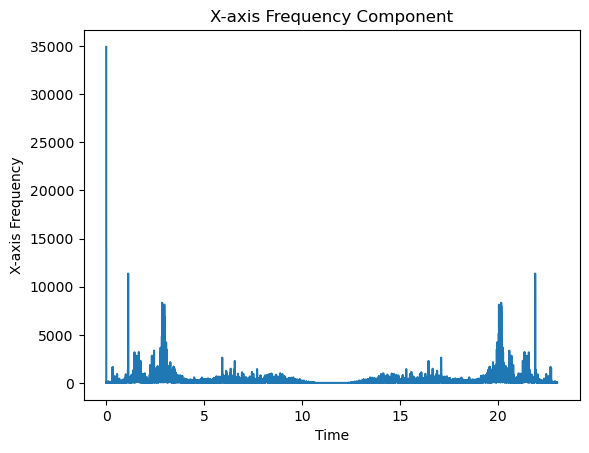

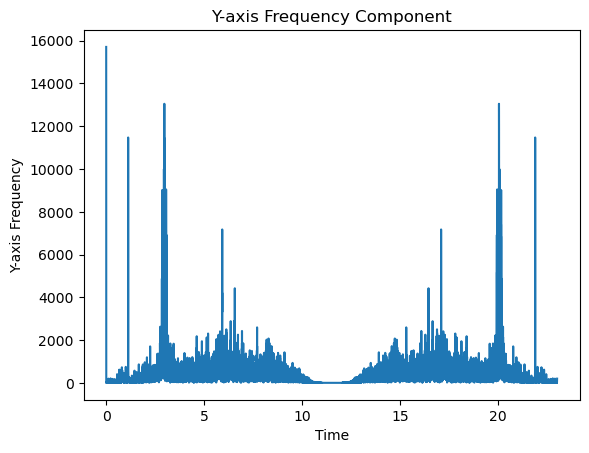

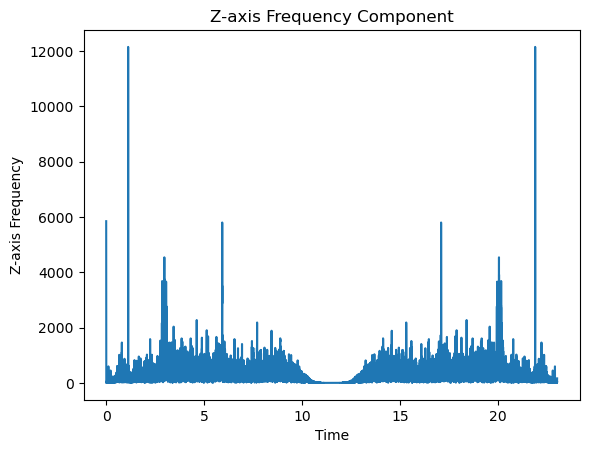

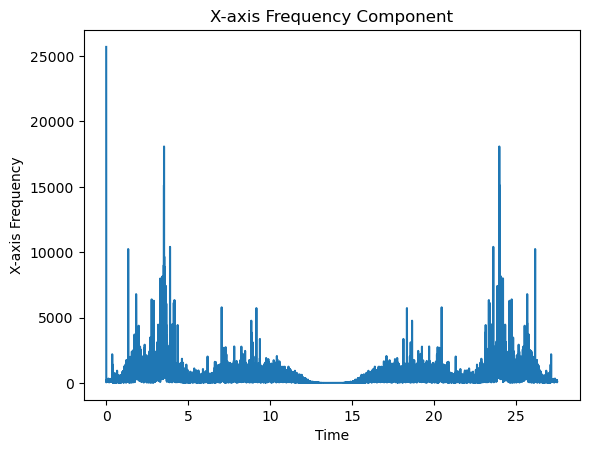

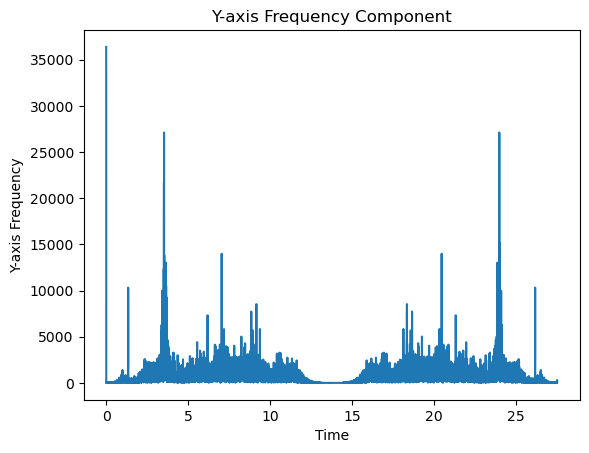

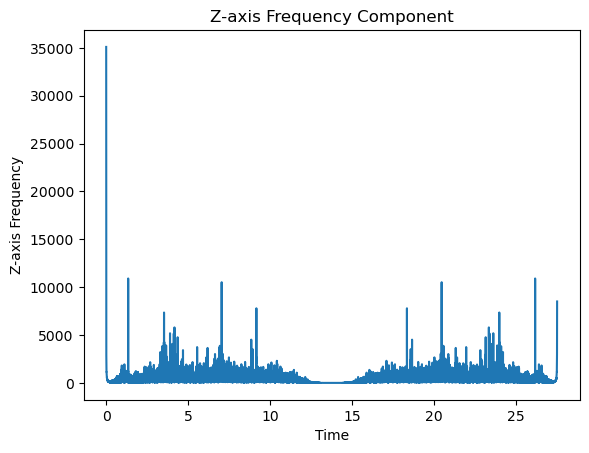

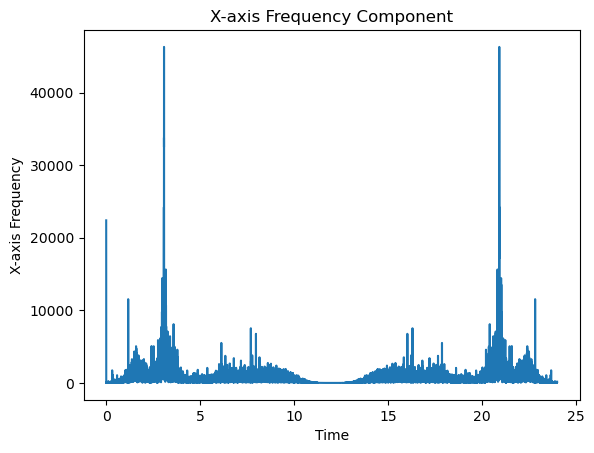

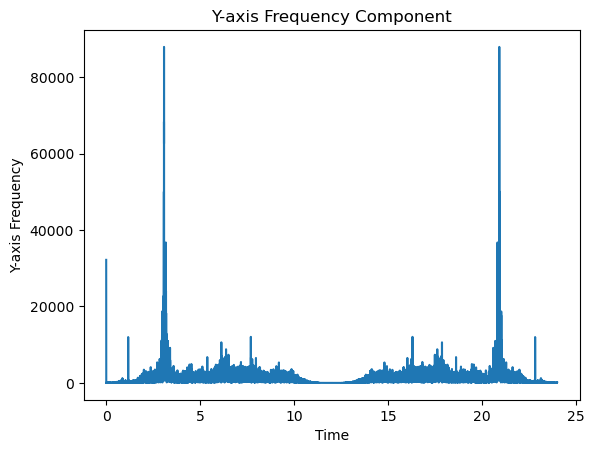

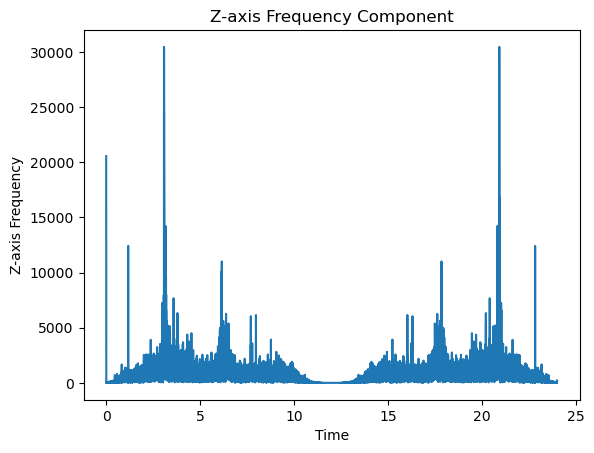

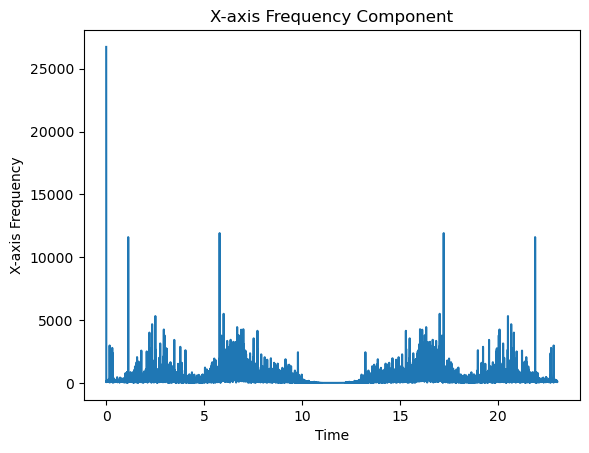

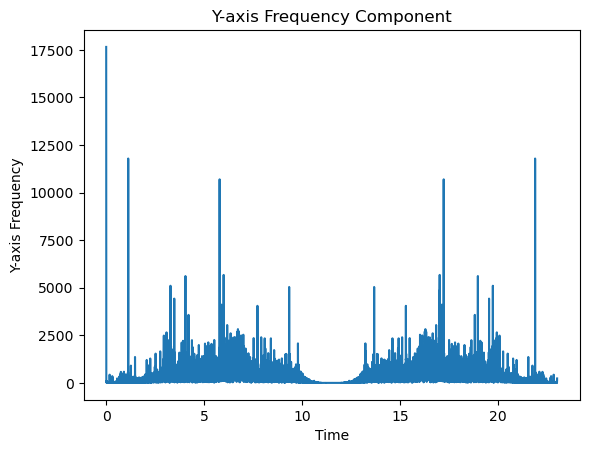

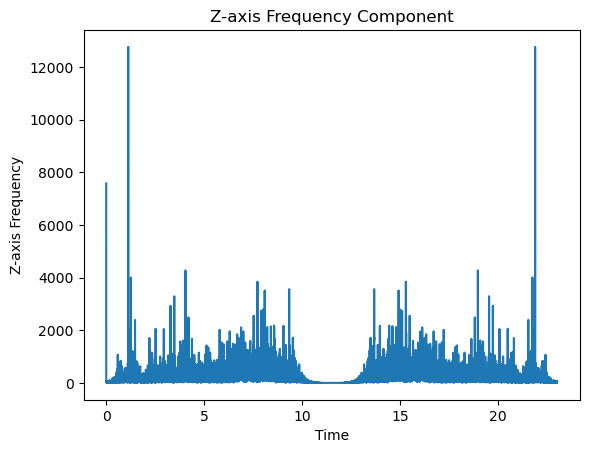

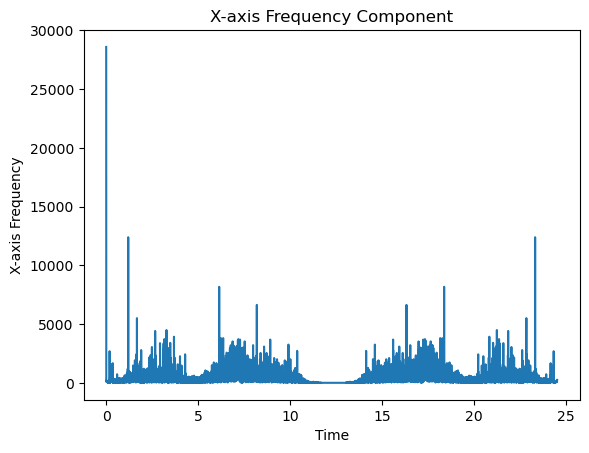

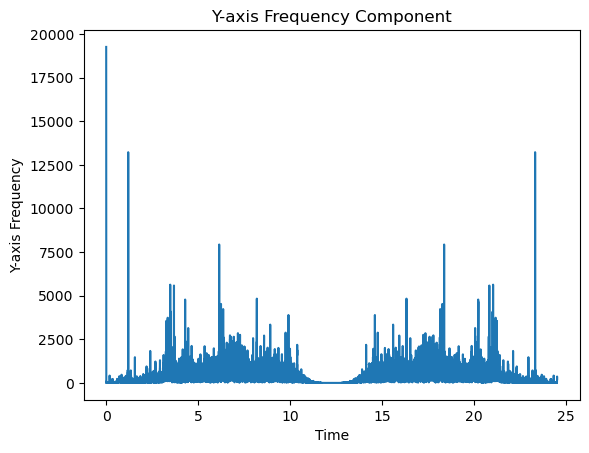

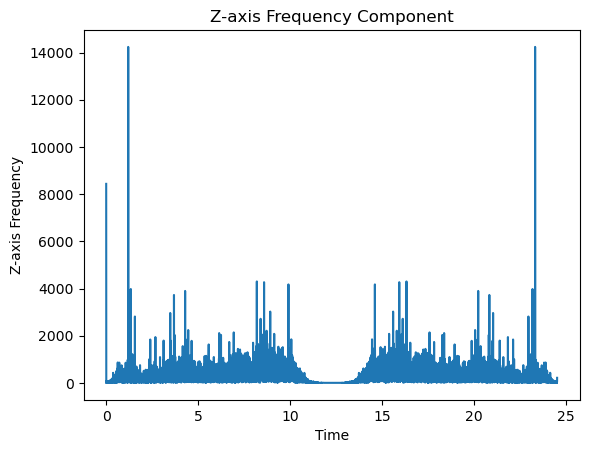

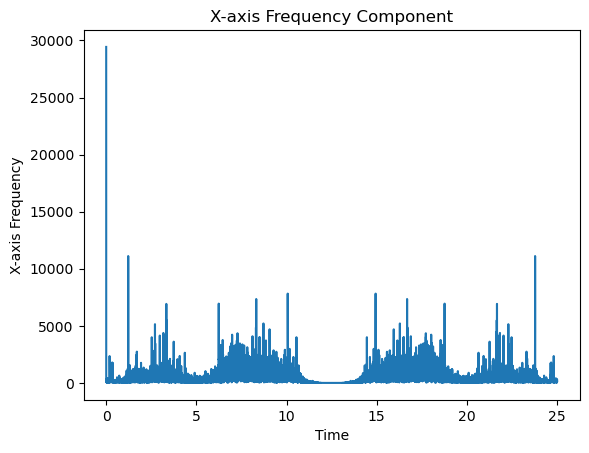

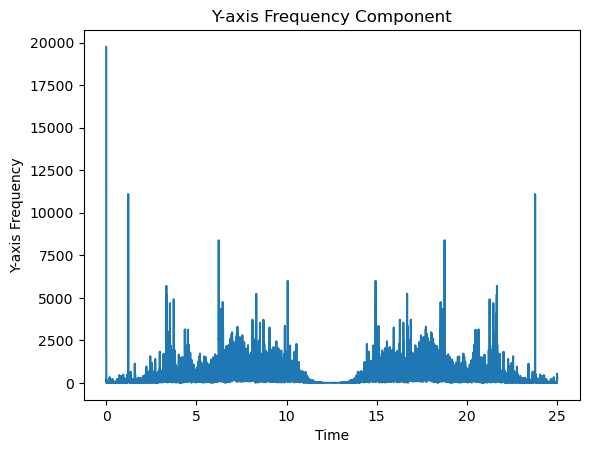

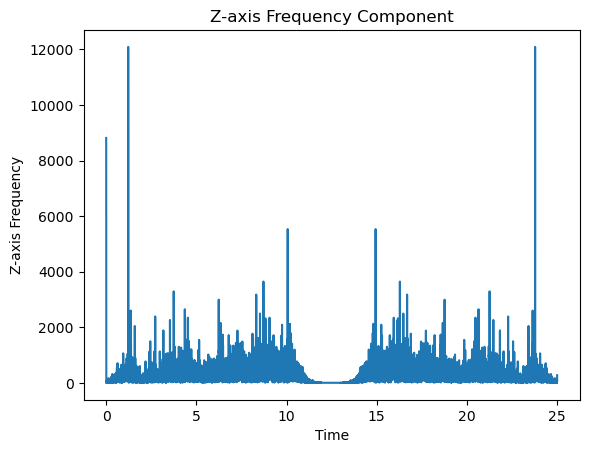

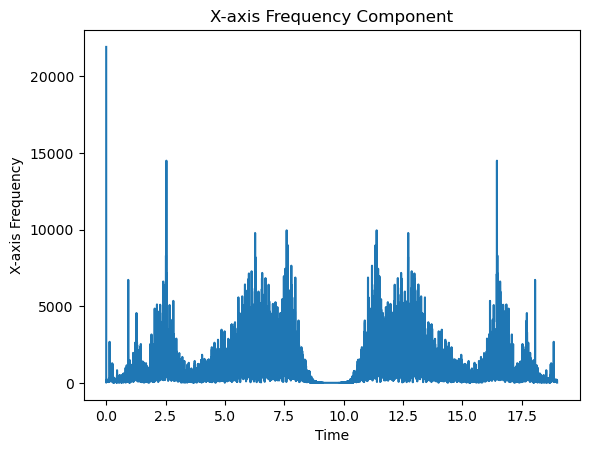

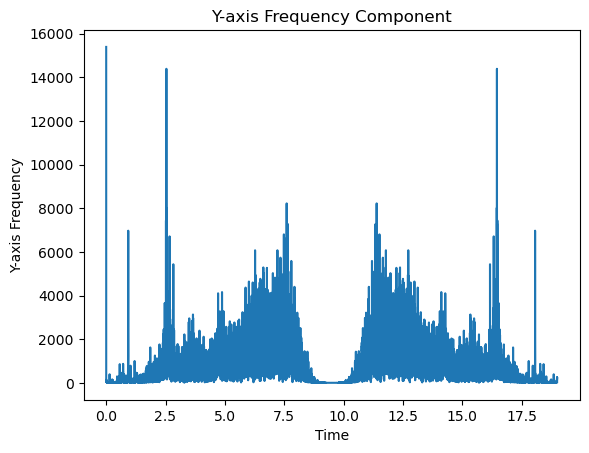

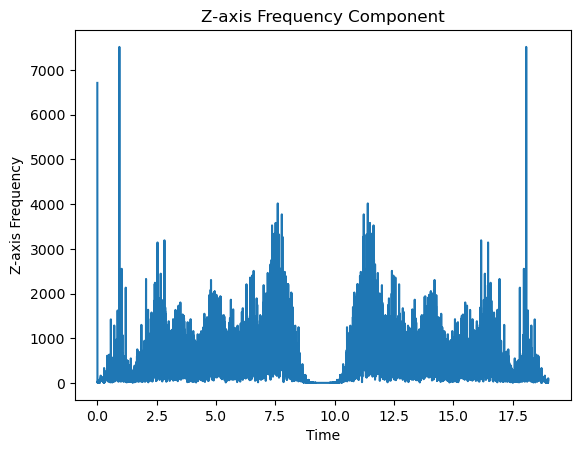

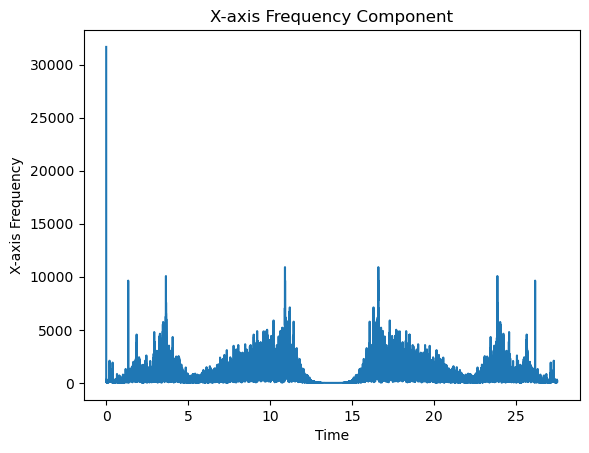

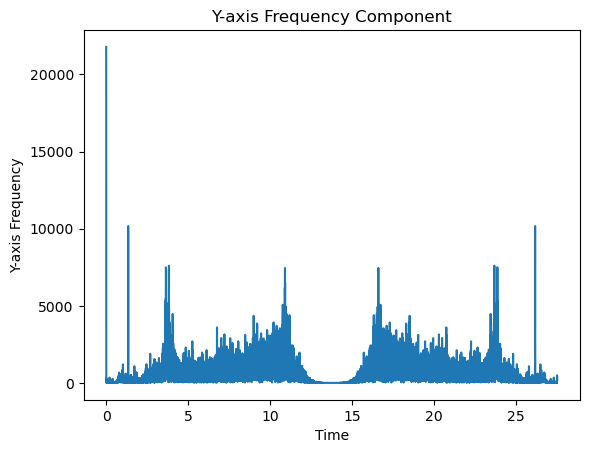

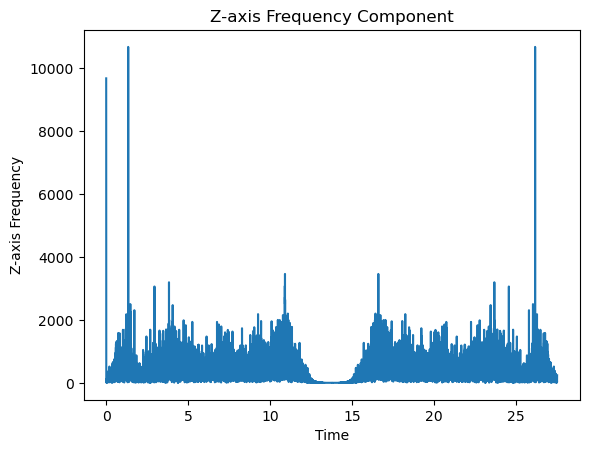

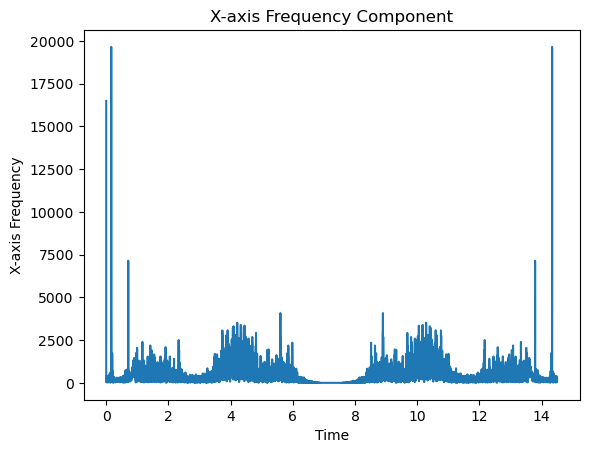

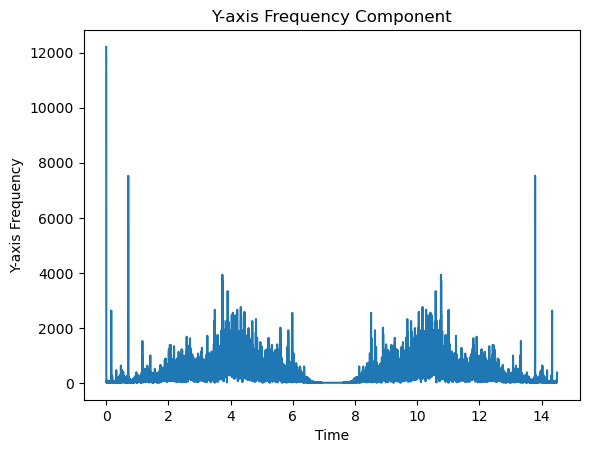

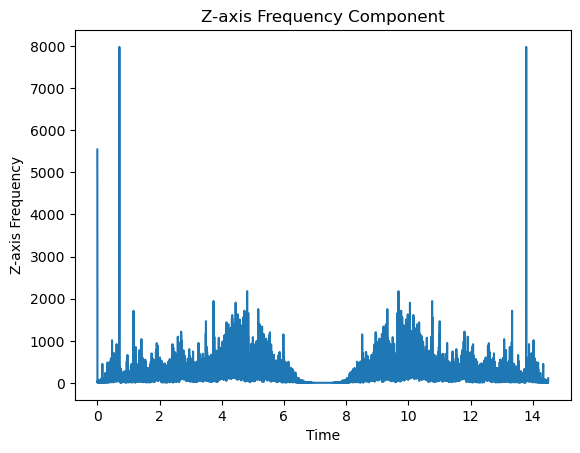

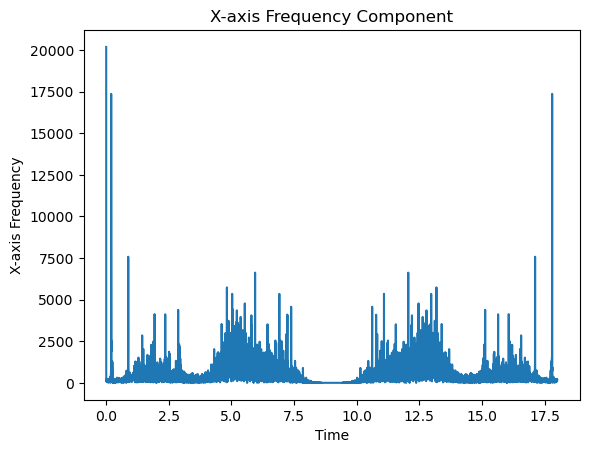

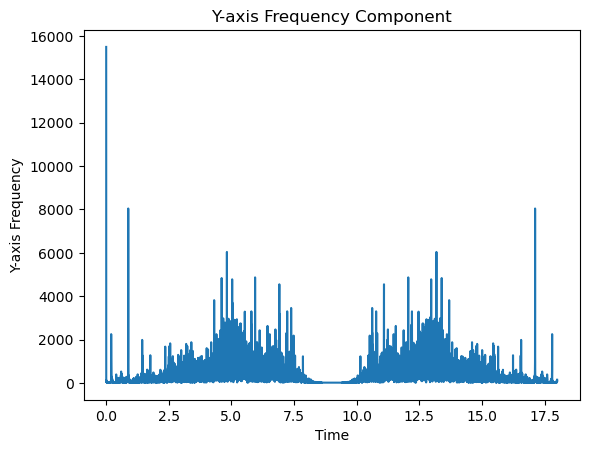

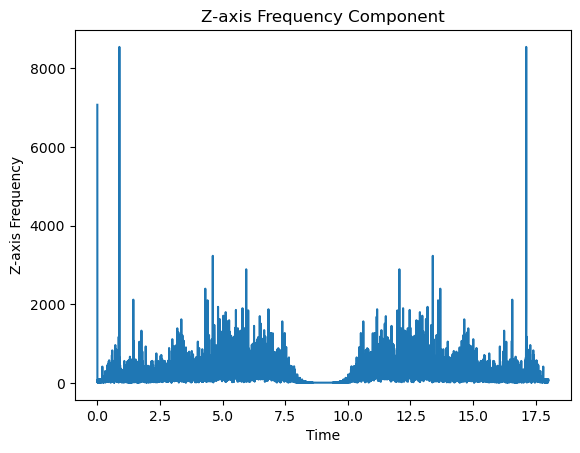

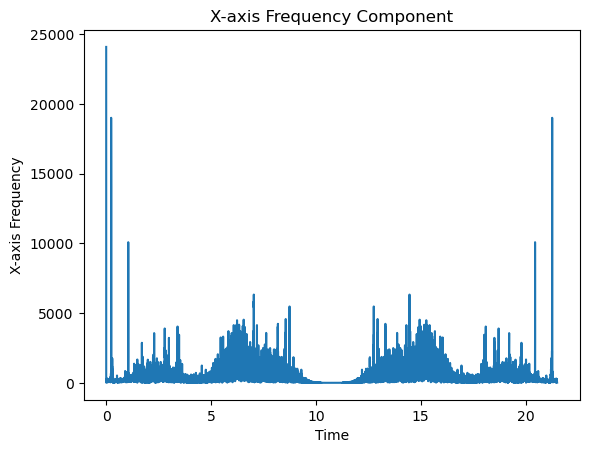

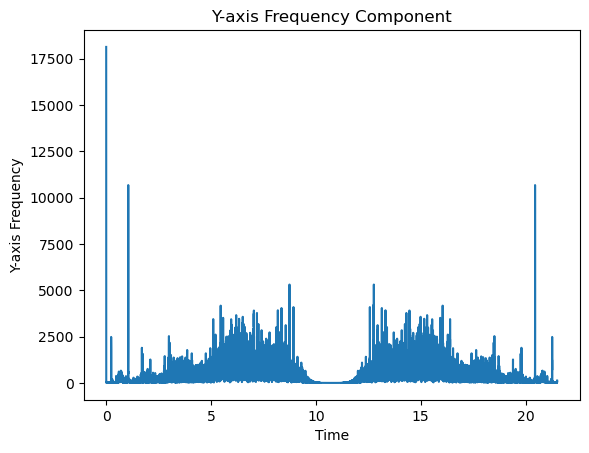

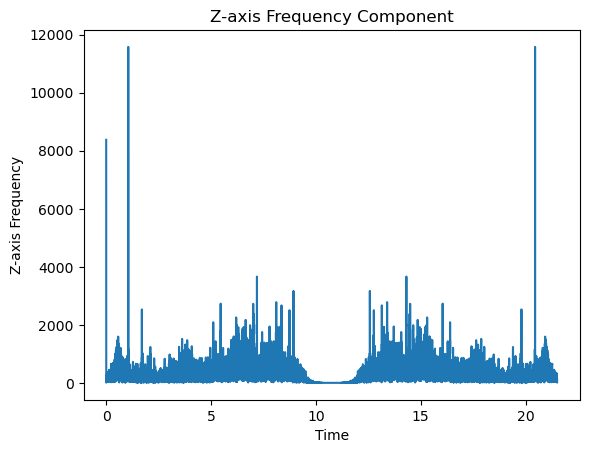

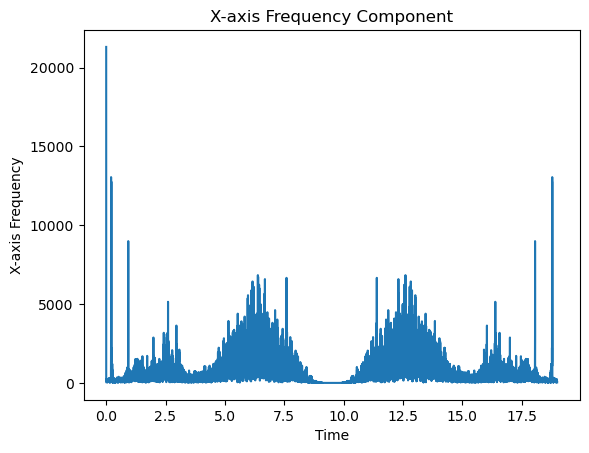

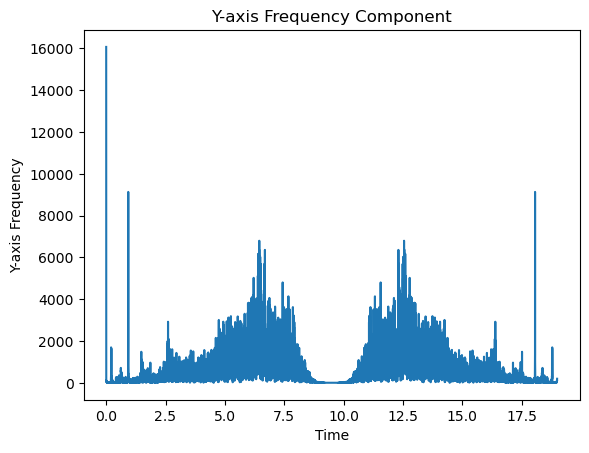

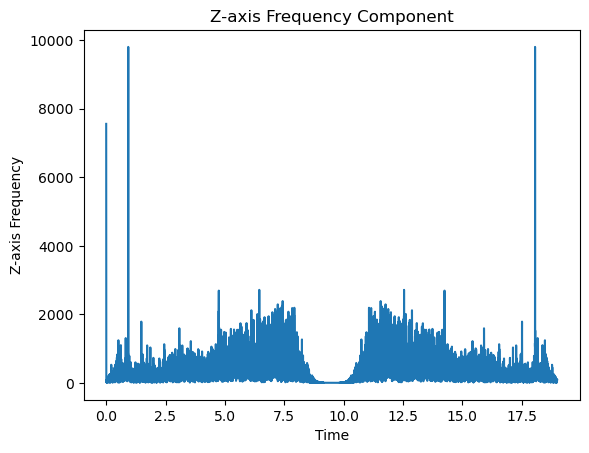

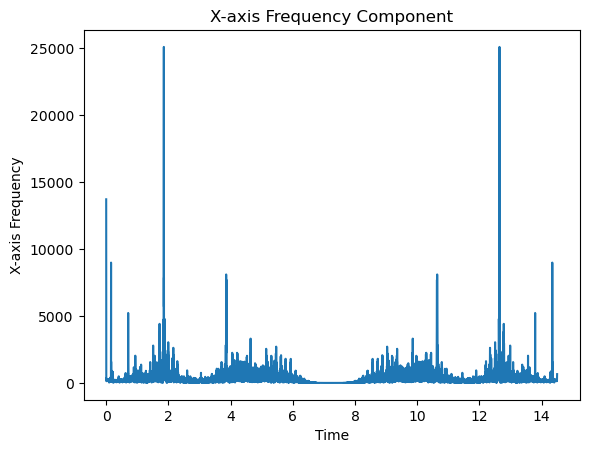

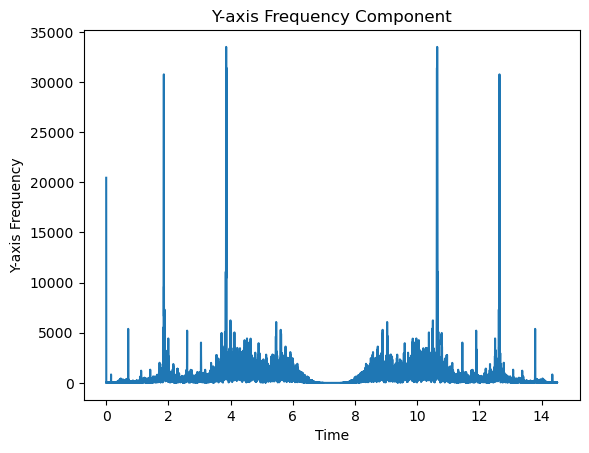

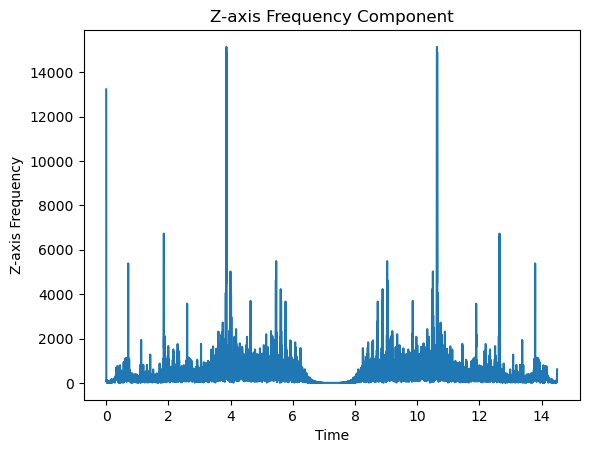

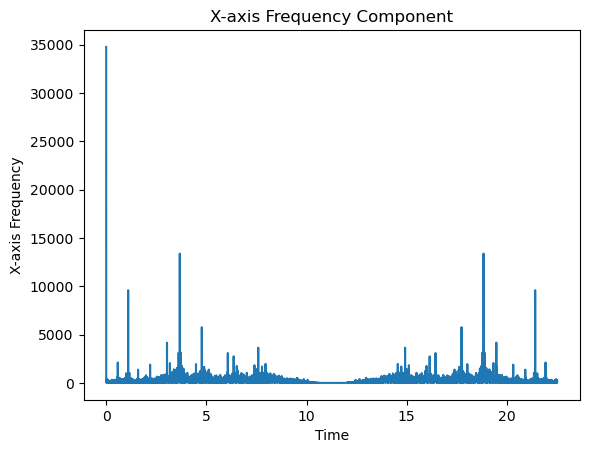

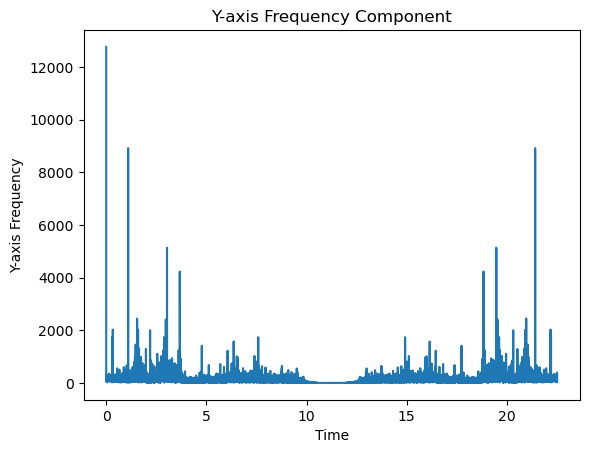

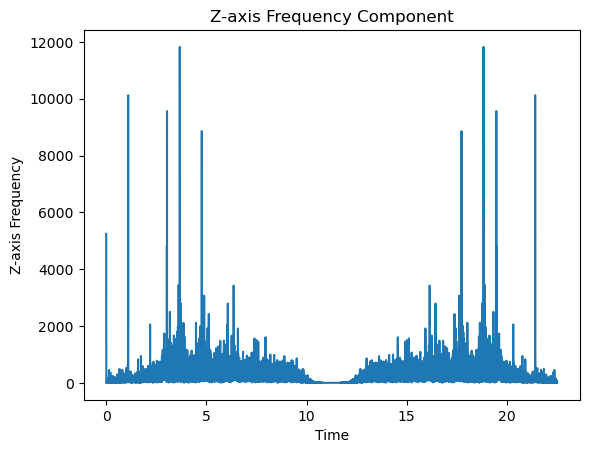

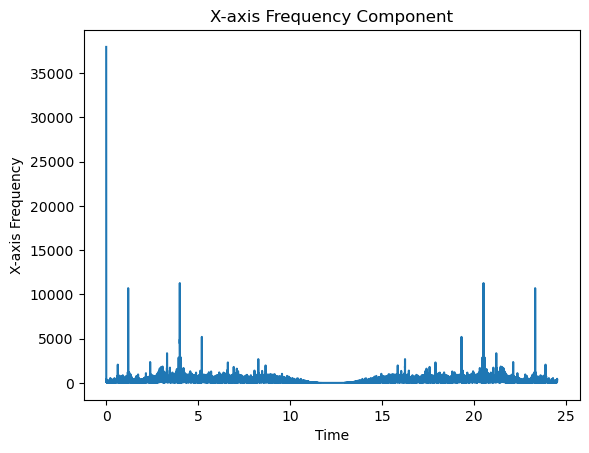

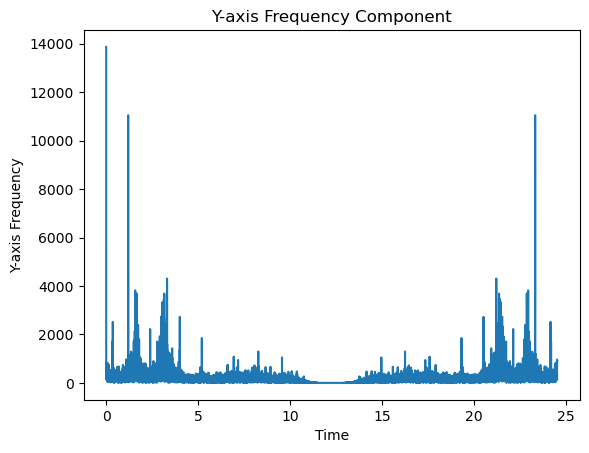

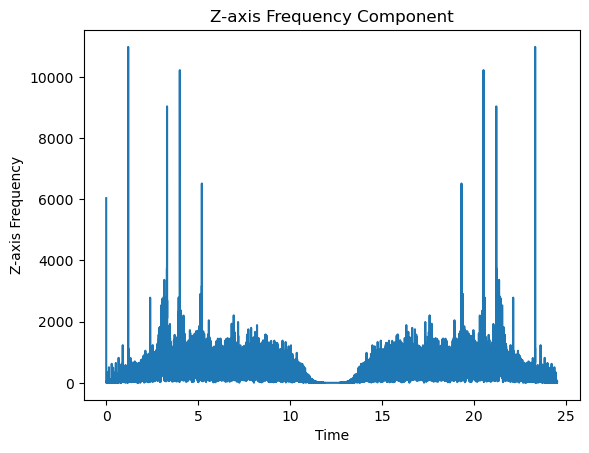

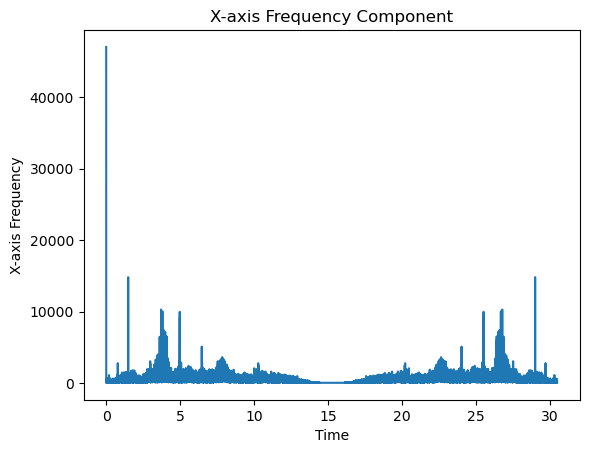

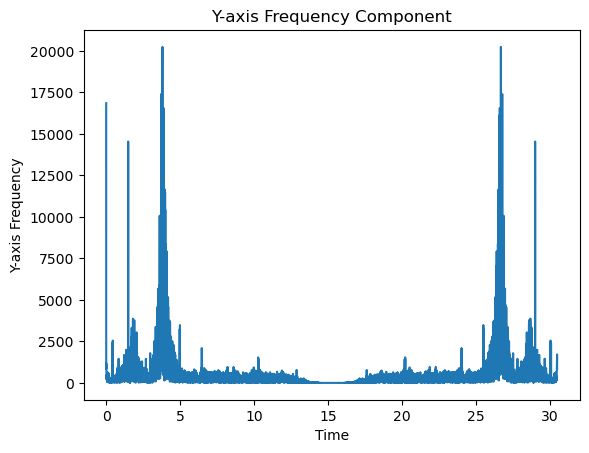

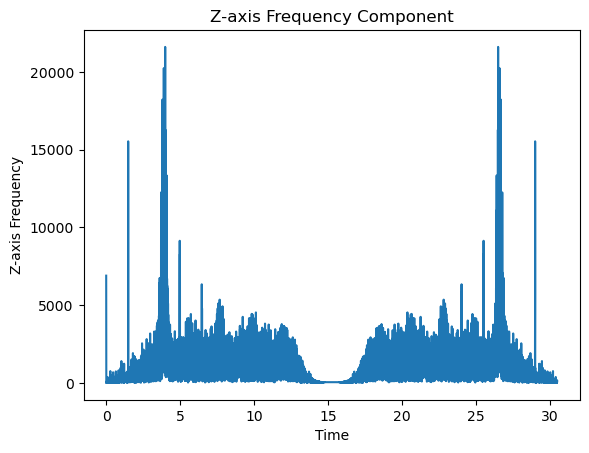

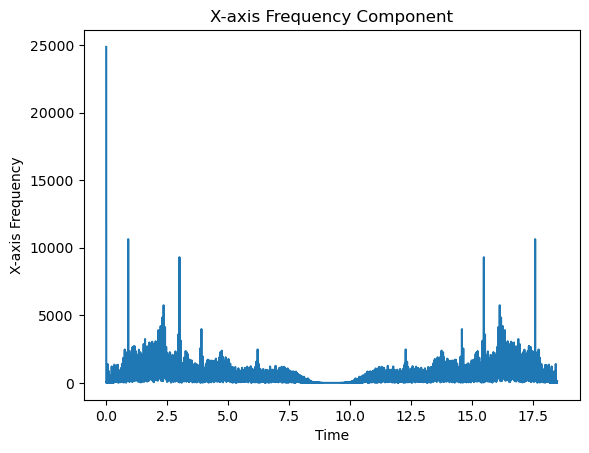

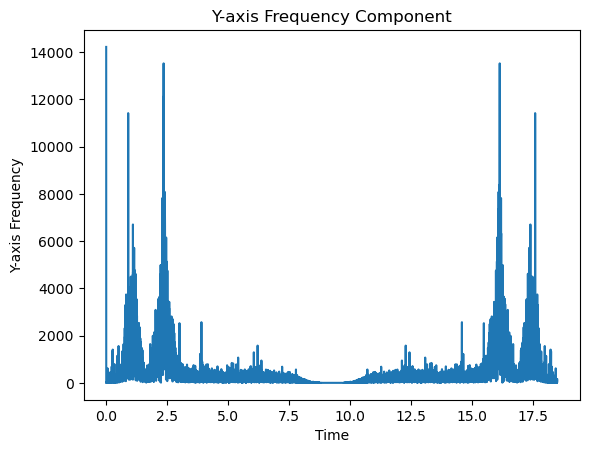

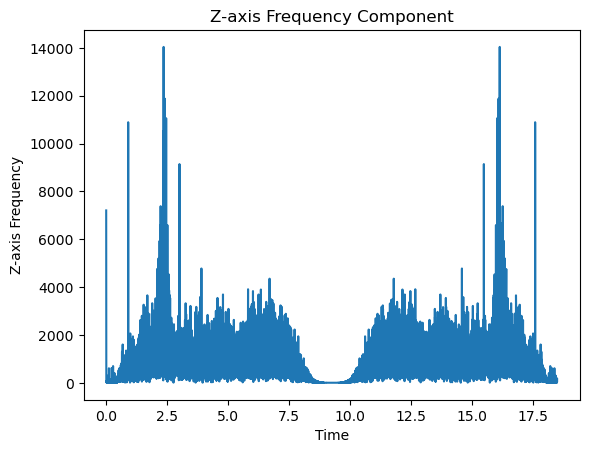

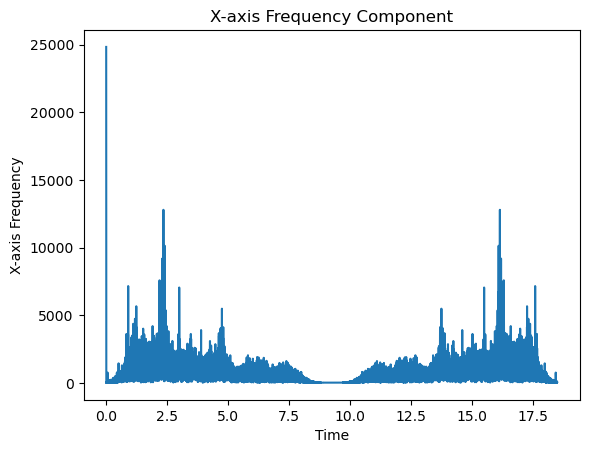

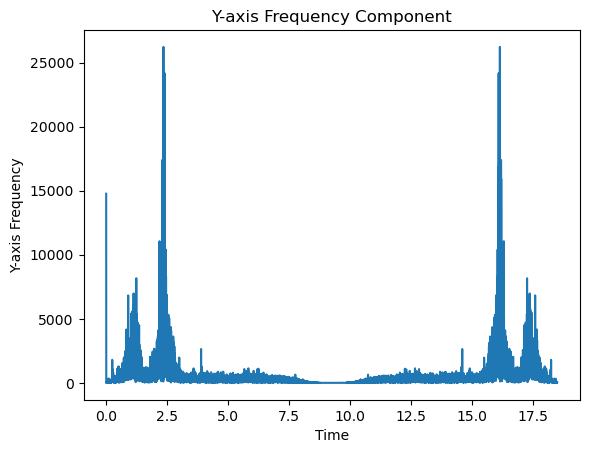

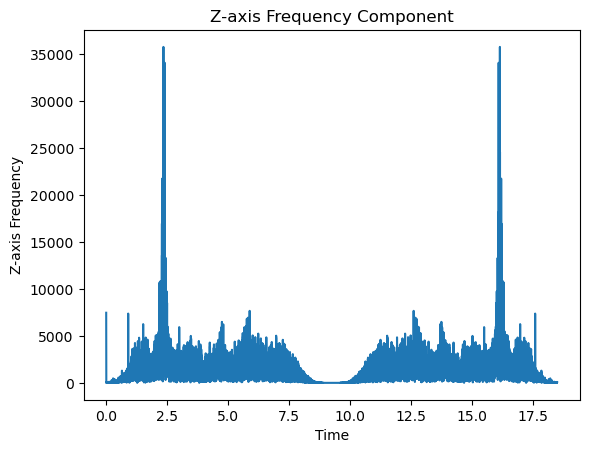

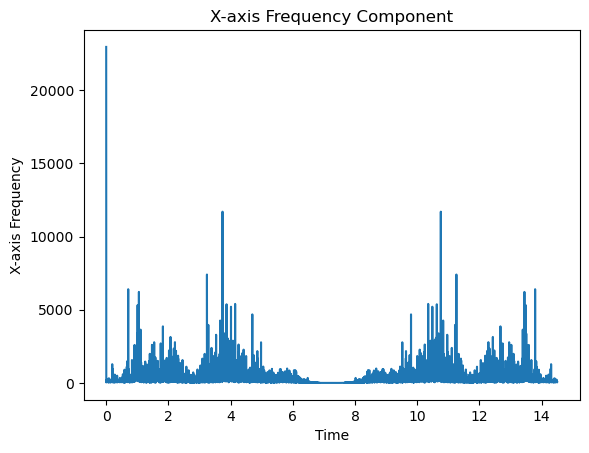

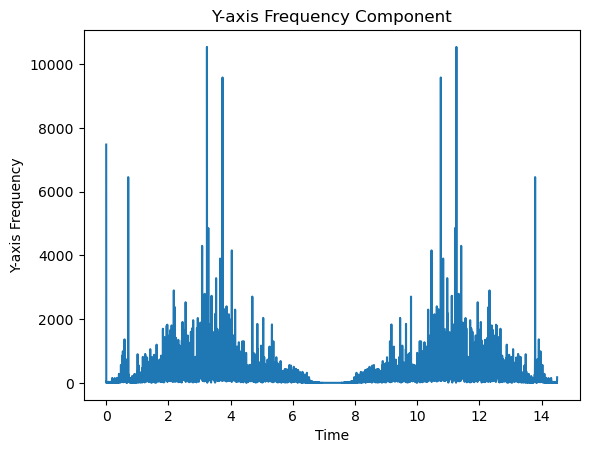

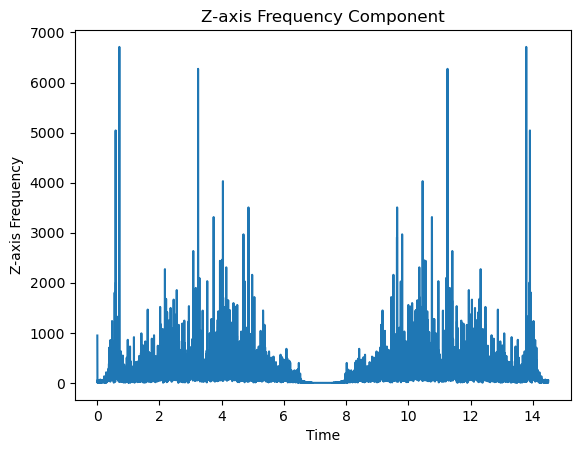

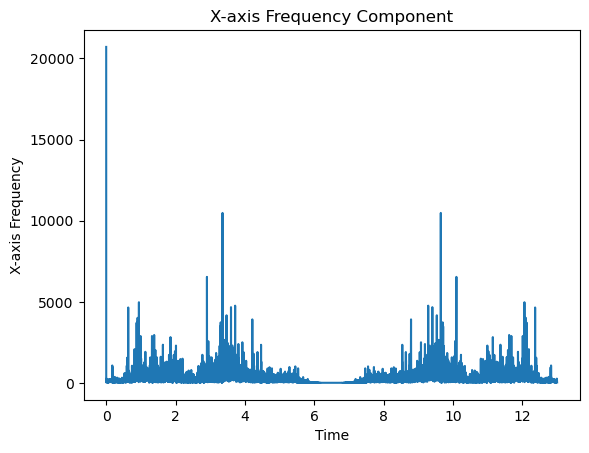

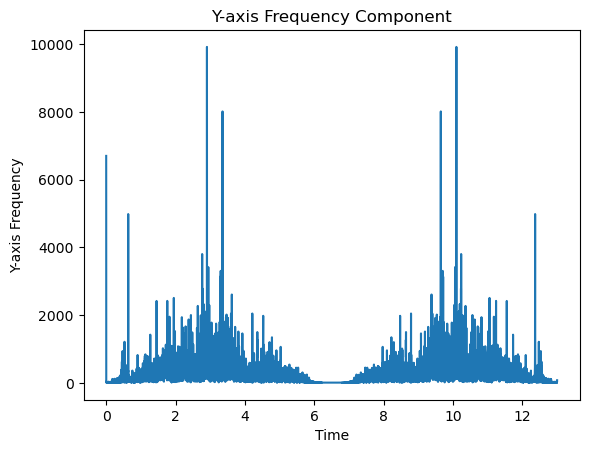

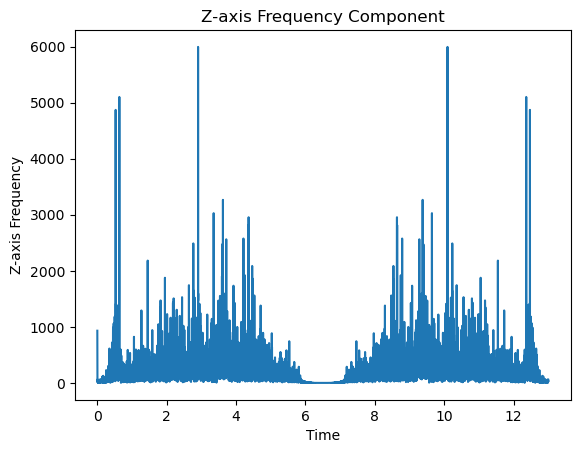

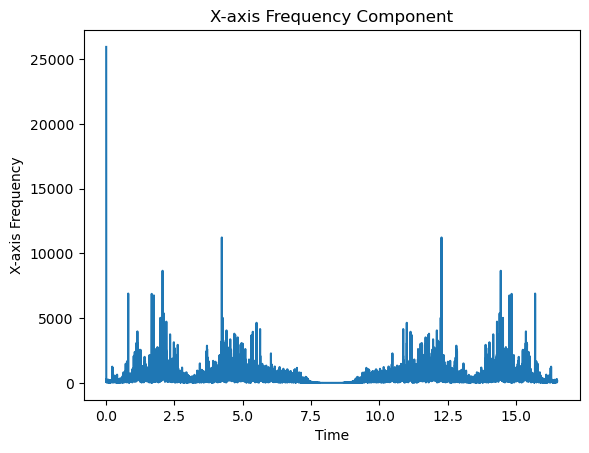

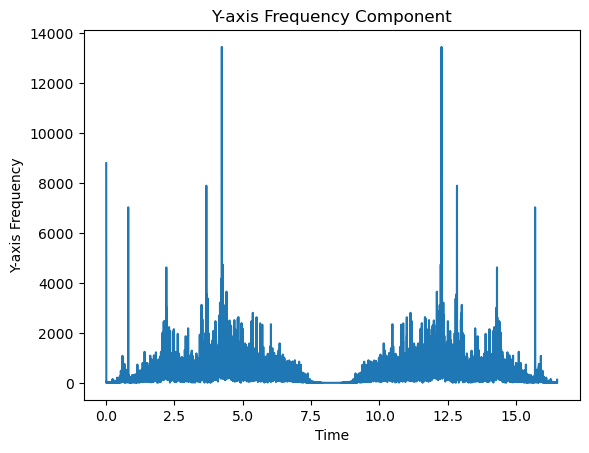

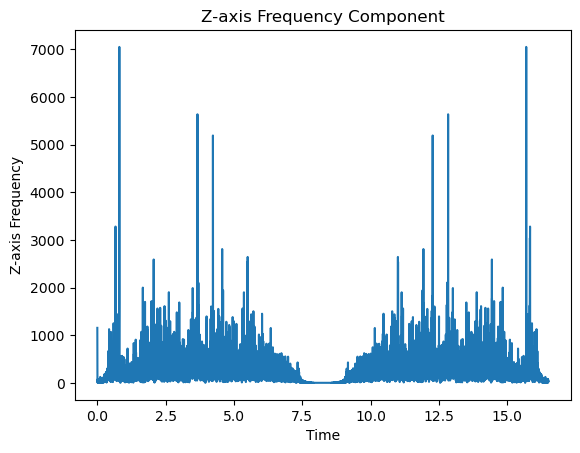

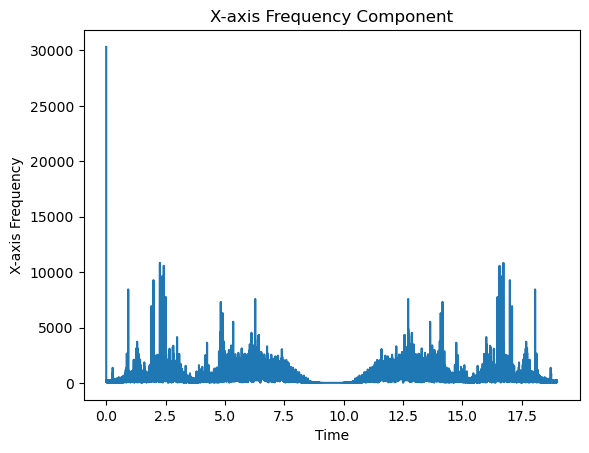

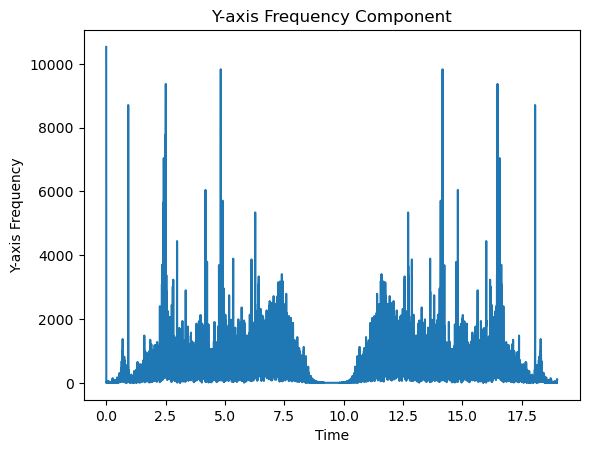

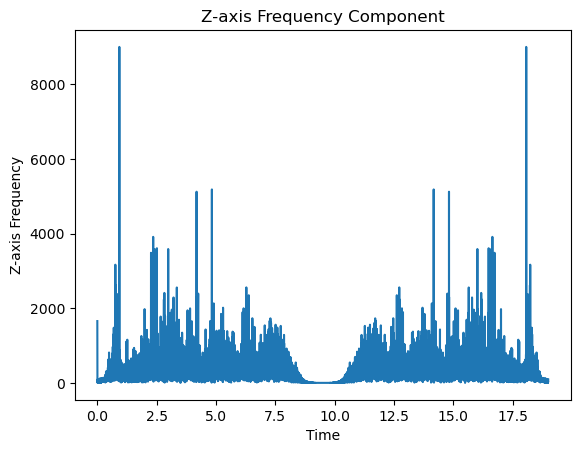

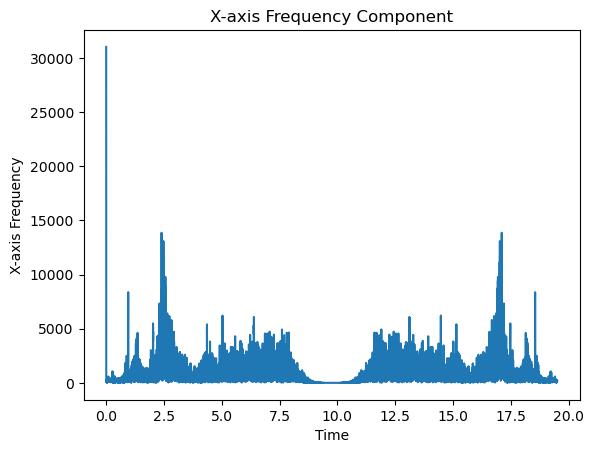

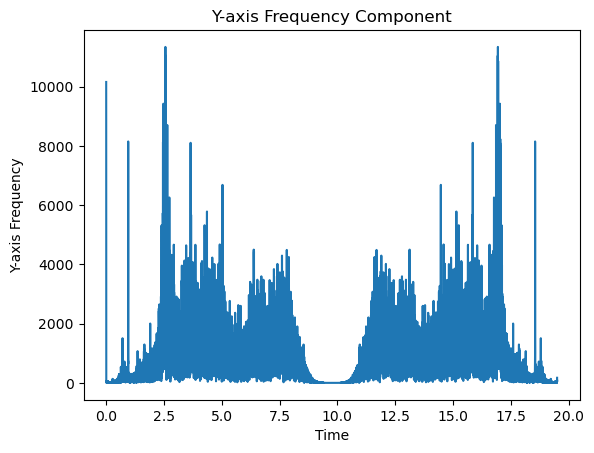

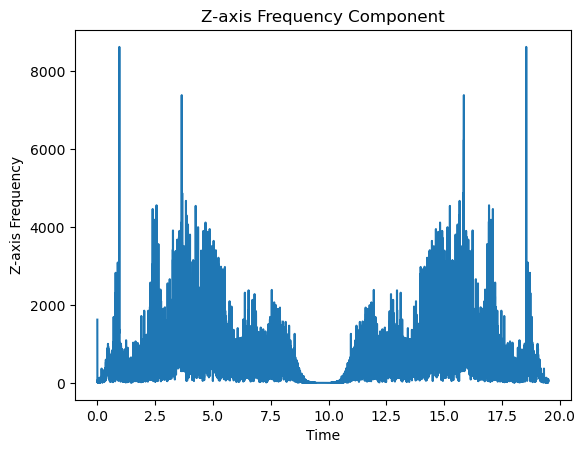

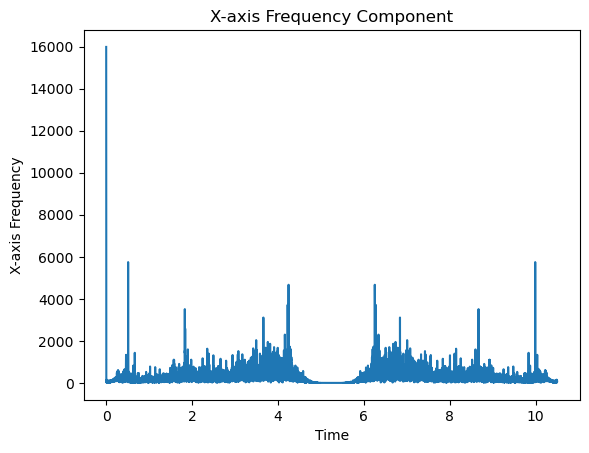

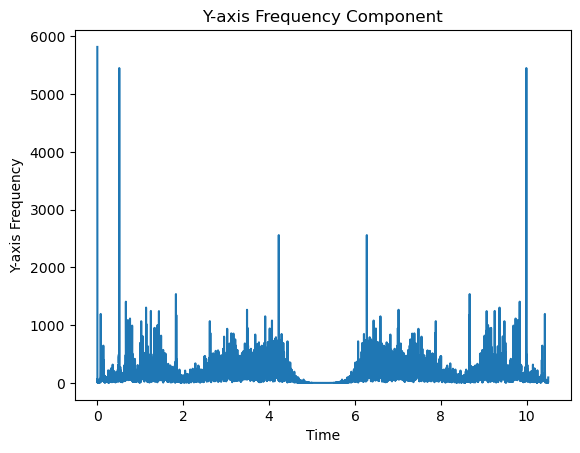

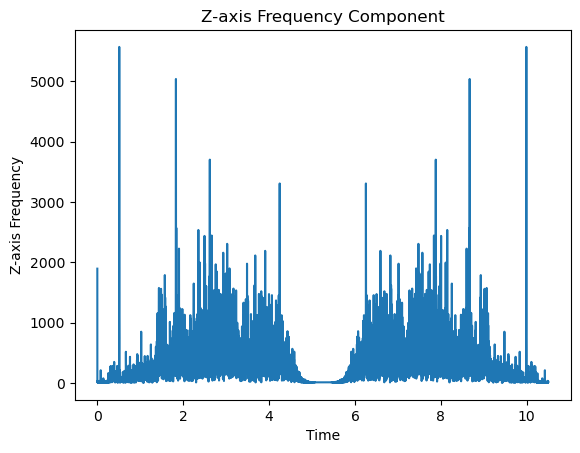

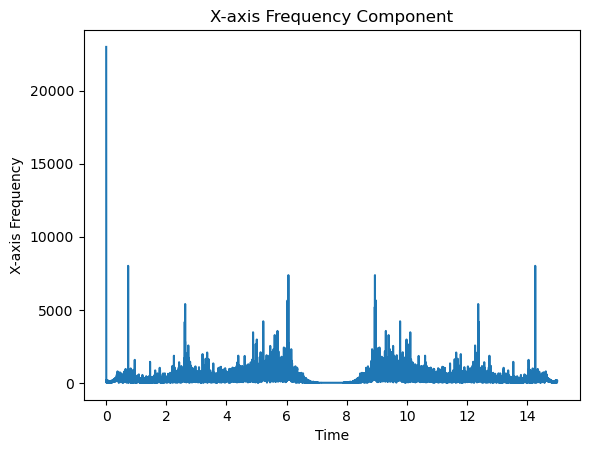

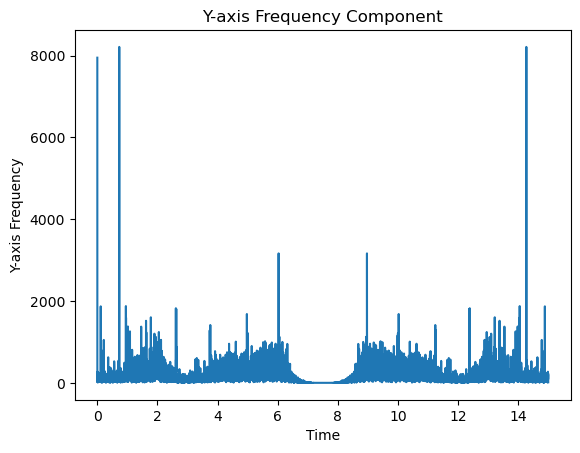

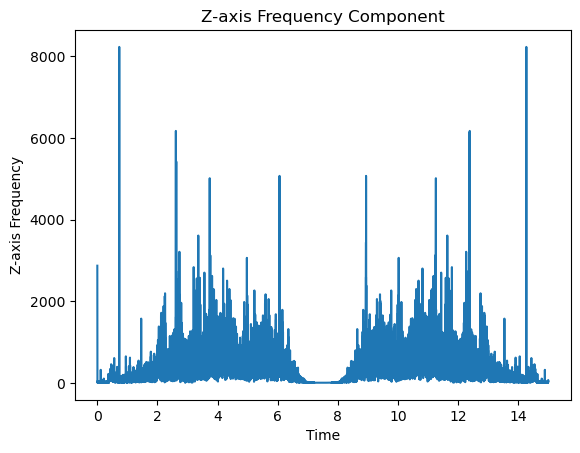

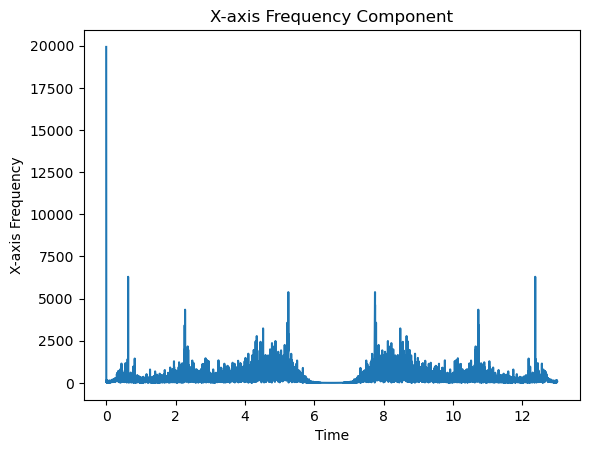

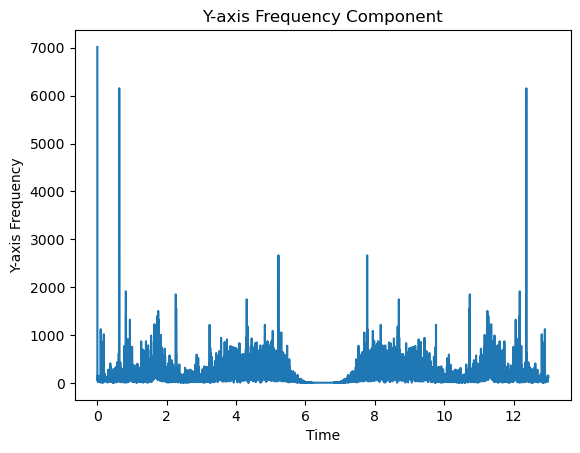

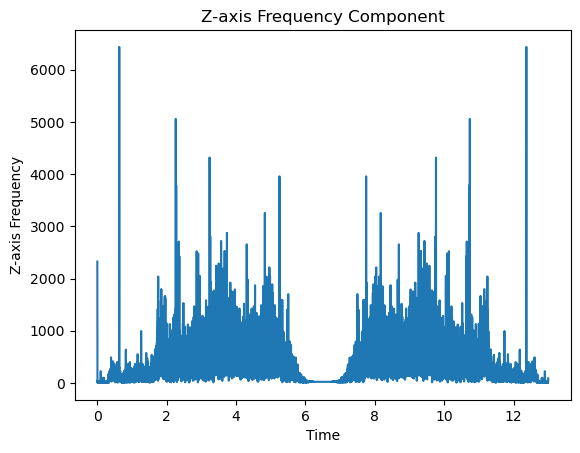

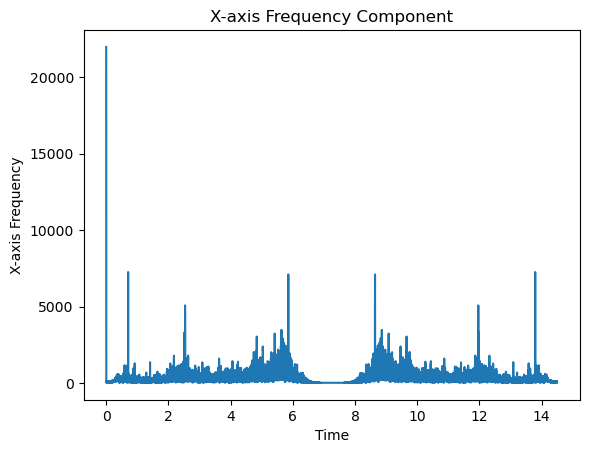

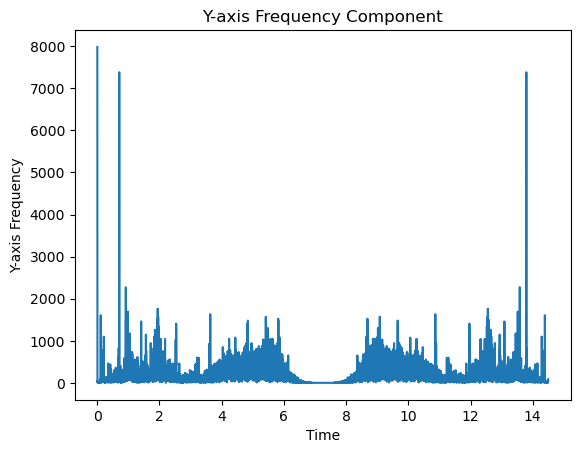

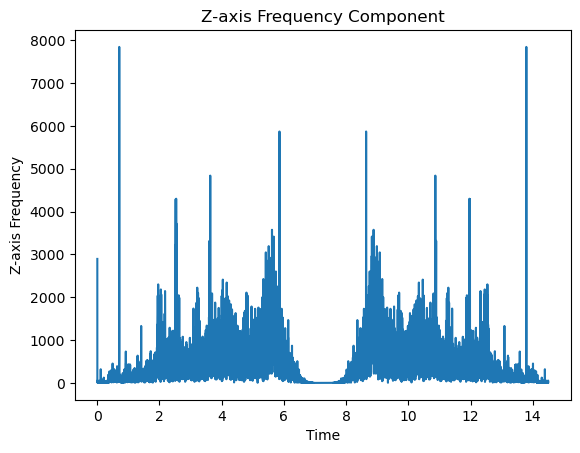

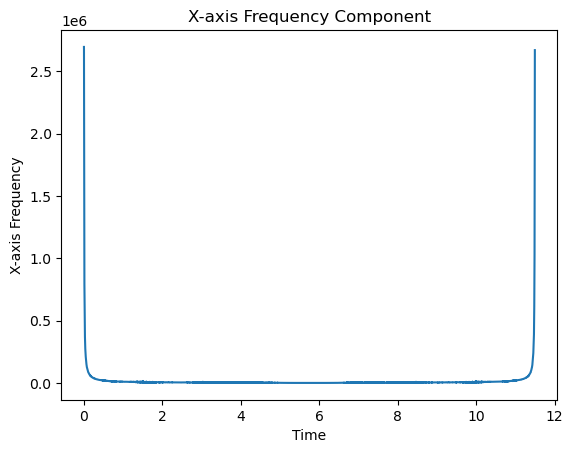

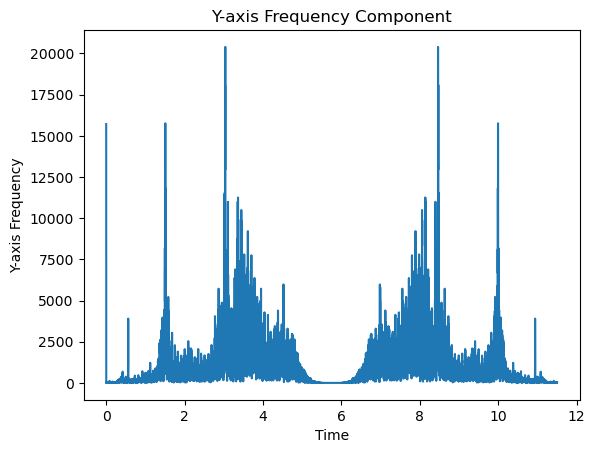

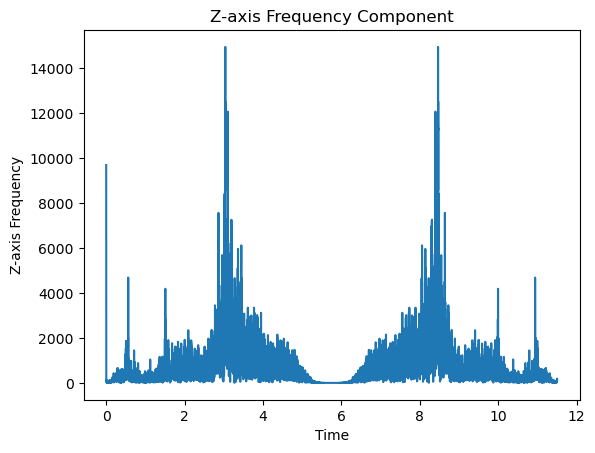

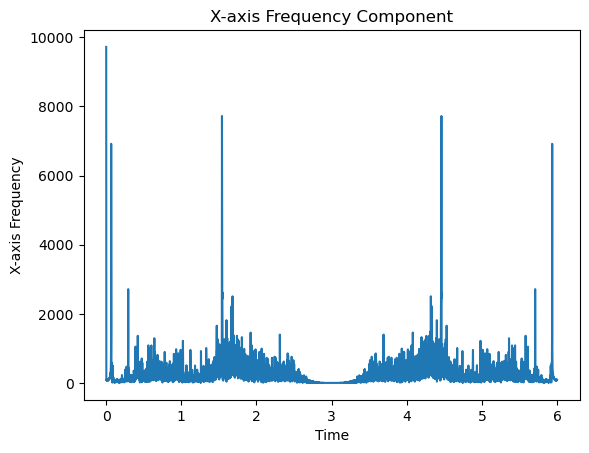

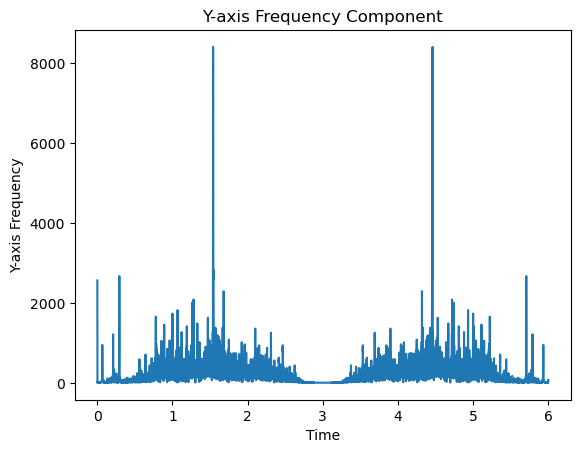

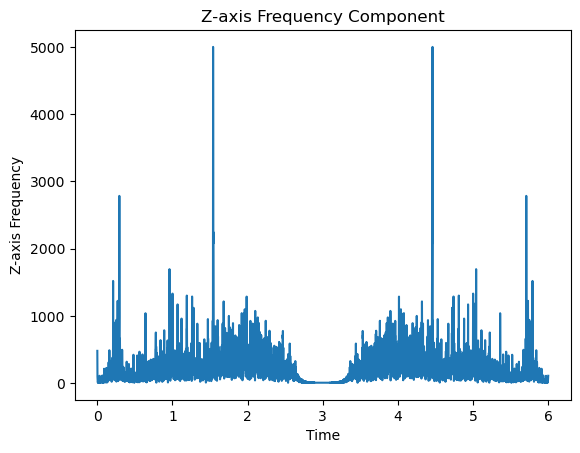

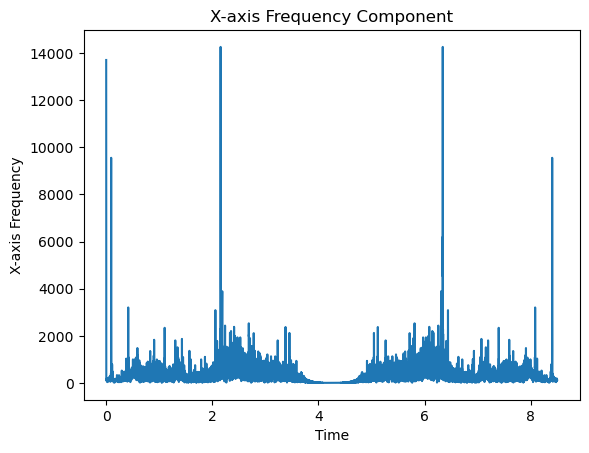

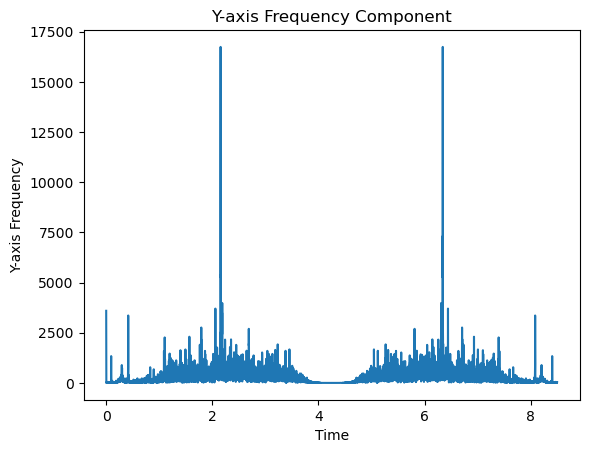

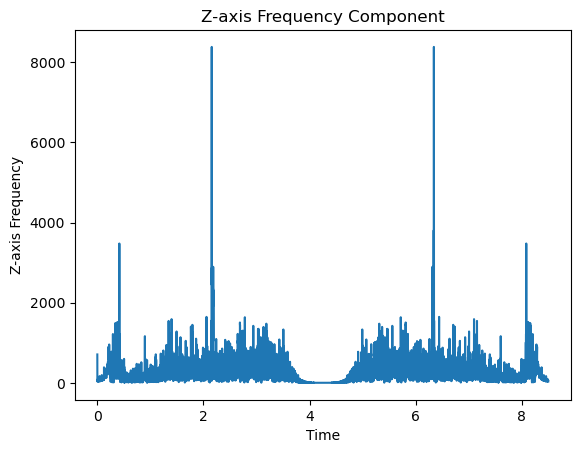

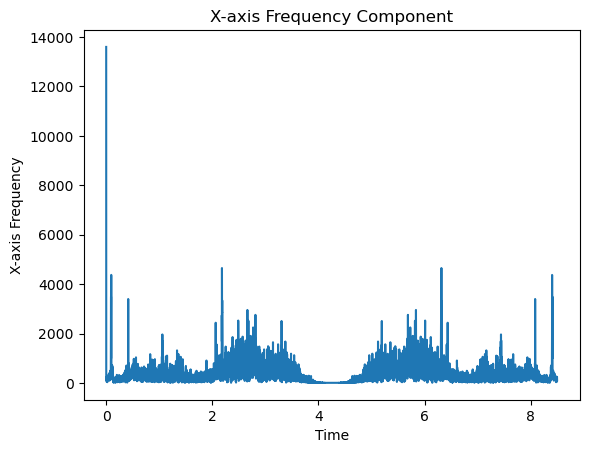

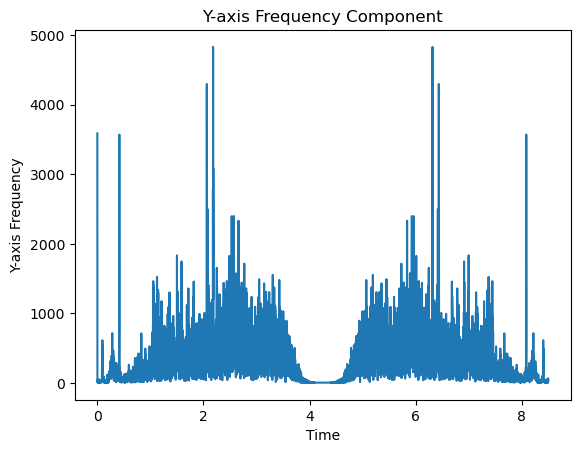

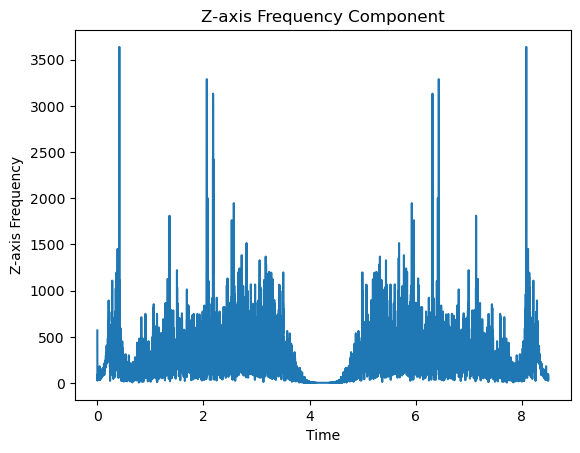

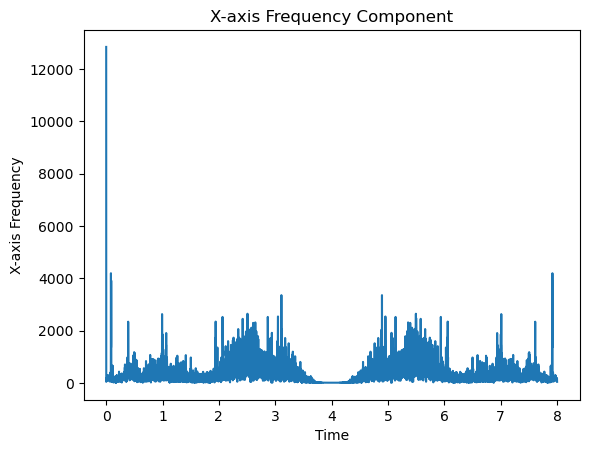

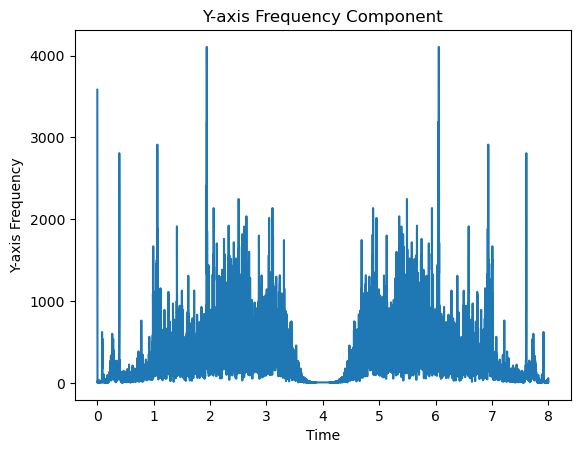

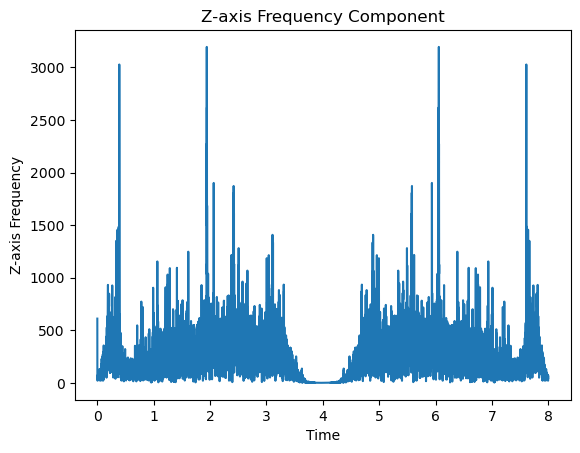

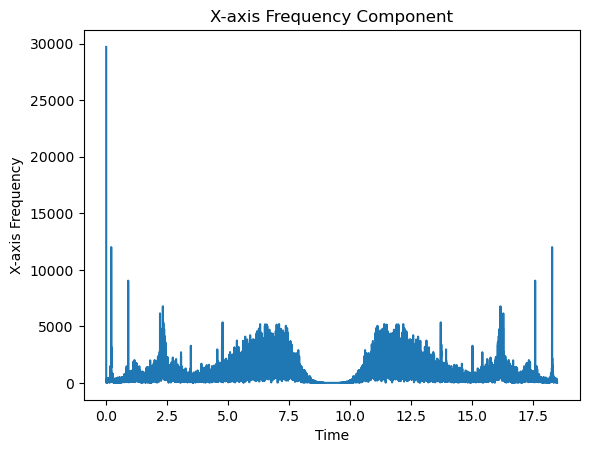

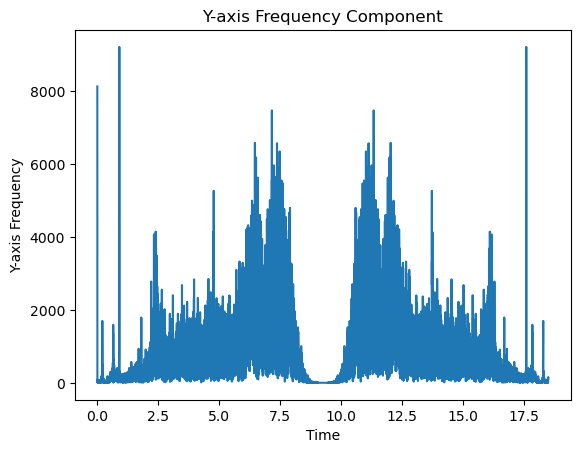

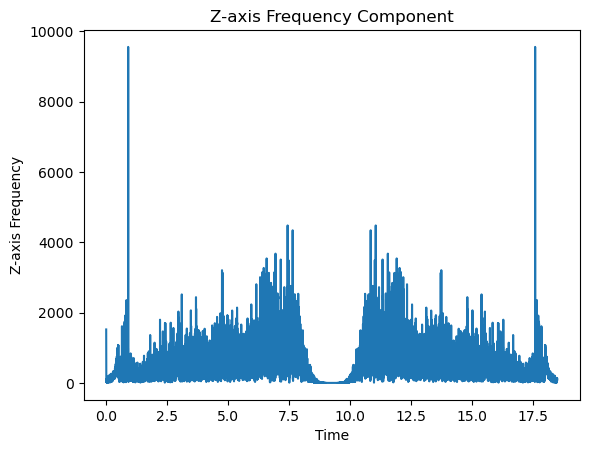

In [61]:
for frequency_df in frequency_dataframes:
    time_data = frequency_df['Time']
    x_freq = frequency_df['X_freq']
    y_freq = frequency_df['Y_freq']
    z_freq = frequency_df['Z_freq']

    # Plot X-axis frequency component
    plt.figure()
    plt.plot(time_data, np.abs(x_freq))
    plt.xlabel('Time')
    plt.ylabel('X-axis Frequency')
    plt.title('X-axis Frequency Component')

    # Plot Y-axis frequency component
    plt.figure()
    plt.plot(time_data, np.abs(y_freq))
    plt.xlabel('Time')
    plt.ylabel('Y-axis Frequency')
    plt.title('Y-axis Frequency Component')

    # Plot Z-axis frequency component
    plt.figure()
    plt.plot(time_data, np.abs(z_freq))
    plt.xlabel('Time')
    plt.ylabel('Z-axis Frequency')
    plt.title('Z-axis Frequency Component')

plt.show()


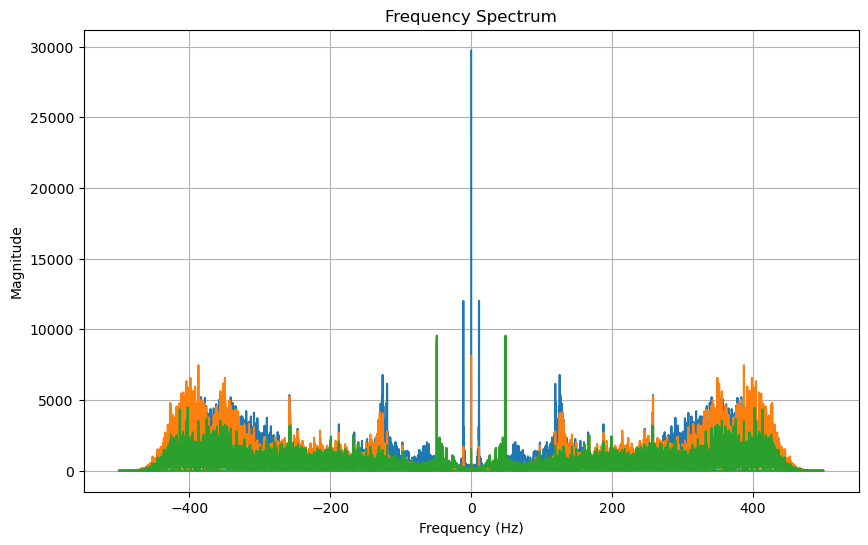

In [62]:
from scipy.fft import fft, fftfreq


# Assuming you have a single accelerometer data frame named 'df'
# Extract the accelerometer values from the dataframe
accel_data = df[['X', 'Y', 'Z']].values

sample_rate = 1000  # Sample rate in samples per second

# Calculate the length of the accelerometer data
num_samples = len(accel_data)

# Calculate the duration of the signal
duration = num_samples / sample_rate

# Calculate the frequencies corresponding to the FFT
frequencies = fftfreq(num_samples, 1 / sample_rate)

# Apply the Fourier transform to the accelerometer data
fft_data = fft(accel_data, axis=0)

# Assuming you want to analyze the magnitude of the frequency components
fft_magnitude = np.abs(fft_data)


plt.figure(figsize=(10, 6))
plt.plot(frequencies, fft_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()